In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
crime_IPC=pd.read_csv(r"D:\data trained\Capstone project\India_Crime - Copy\01_District_wise_crimes_committed_IPC_2001_2012.csv")
crime_IPC

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
0,ANDHRA PRADESH,ADILABAD,2001,101,60,17,50,0,50,46,...,30,1131,16,149,34,175,0,181,1518,4154
1,ANDHRA PRADESH,ANANTAPUR,2001,151,125,1,23,0,23,53,...,69,1543,7,118,24,154,0,270,754,4125
2,ANDHRA PRADESH,CHITTOOR,2001,101,57,2,27,0,27,59,...,38,2088,14,112,83,186,0,404,1262,5818
3,ANDHRA PRADESH,CUDDAPAH,2001,80,53,1,20,0,20,25,...,23,795,17,126,38,57,0,233,1181,3140
4,ANDHRA PRADESH,EAST GODAVARI,2001,82,67,1,23,0,23,49,...,41,1244,12,109,58,247,0,431,2313,6507
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9012,LAKSHADWEEP,LAKSHADWEEP,2012,0,0,0,0,0,0,0,...,3,3,0,1,0,1,0,0,32,60
9013,LAKSHADWEEP,TOTAL,2012,0,0,0,0,0,0,0,...,3,3,0,1,0,1,0,0,32,60
9014,PUDUCHERRY,KARAIKAL,2012,5,6,2,6,0,6,2,...,1,186,0,2,0,1,0,44,392,787
9015,PUDUCHERRY,PUDUCHERRY,2012,24,21,10,7,0,7,17,...,20,632,0,7,2,5,0,219,1668,3494


In [4]:
crime_IPC["STATE/UT"].unique()

array(['ANDHRA PRADESH', 'ARUNACHAL PRADESH', 'ASSAM', 'BIHAR',
       'CHHATTISGARH', 'GOA', 'GUJARAT', 'HARYANA', 'HIMACHAL PRADESH',
       'JAMMU & KASHMIR', 'JHARKHAND', 'KARNATAKA', 'KERALA',
       'MADHYA PRADESH', 'MAHARASHTRA', 'MANIPUR', 'MEGHALAYA', 'MIZORAM',
       'NAGALAND', 'ODISHA', 'PUNJAB', 'RAJASTHAN', 'SIKKIM',
       'TAMIL NADU', 'TRIPURA', 'UTTAR PRADESH', 'UTTARAKHAND',
       'WEST BENGAL', 'A & N ISLANDS', 'CHANDIGARH', 'D & N HAVELI',
       'DAMAN & DIU', 'DELHI UT', 'LAKSHADWEEP', 'PUDUCHERRY'],
      dtype=object)

In [5]:
crime_IPC["STATE/UT"].nunique()

35

In [6]:
#Deleting "Total" values From DISTRICT column
crime_IPC = crime_IPC[crime_IPC['DISTRICT'] != 'TOTAL']
crime_IPC.reset_index(drop=True, inplace=True)
crime_IPC

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
0,ANDHRA PRADESH,ADILABAD,2001,101,60,17,50,0,50,46,...,30,1131,16,149,34,175,0,181,1518,4154
1,ANDHRA PRADESH,ANANTAPUR,2001,151,125,1,23,0,23,53,...,69,1543,7,118,24,154,0,270,754,4125
2,ANDHRA PRADESH,CHITTOOR,2001,101,57,2,27,0,27,59,...,38,2088,14,112,83,186,0,404,1262,5818
3,ANDHRA PRADESH,CUDDAPAH,2001,80,53,1,20,0,20,25,...,23,795,17,126,38,57,0,233,1181,3140
4,ANDHRA PRADESH,EAST GODAVARI,2001,82,67,1,23,0,23,49,...,41,1244,12,109,58,247,0,431,2313,6507
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8604,DELHI UT,STF,2012,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,6
8605,DELHI UT,WEST,2012,52,37,10,79,0,79,454,...,18,227,18,53,6,327,0,292,1144,5558
8606,LAKSHADWEEP,LAKSHADWEEP,2012,0,0,0,0,0,0,0,...,3,3,0,1,0,1,0,0,32,60
8607,PUDUCHERRY,KARAIKAL,2012,5,6,2,6,0,6,2,...,1,186,0,2,0,1,0,44,392,787


In [7]:
#Replacing the STATE/UT columns DELHI UT with DELHI
crime_IPC["STATE/UT"]=crime_IPC["STATE/UT"].replace("DELHI UT","DELHI")

In [8]:
crime_IPC['DISTRICT'].unique()

array(['ADILABAD', 'ANANTAPUR', 'CHITTOOR', 'CUDDAPAH', 'EAST GODAVARI',
       'GUNTAKAL RLY.', 'GUNTUR', 'HYDERABAD CITY', 'KARIMNAGAR',
       'KHAMMAM', 'KRISHNA', 'KURNOOL', 'MAHABOOBNAGAR', 'MEDAK',
       'NALGONDA', 'NELLORE', 'NIZAMABAD', 'PRAKASHAM', 'RANGA REDDY',
       'SECUNDERABAD RLY.', 'SRIKAKULAM', 'VIJAYAWADA', 'VIJAYAWADA RLY.',
       'VISAKHA RURAL', 'VISAKHAPATNAM', 'VIZIANAGARAM', 'WARANGAL',
       'WEST GODAVARI', 'CHANGLANG', 'DIBANG VALLEY', 'KAMENG EAST',
       'KAMENG WEST', 'LOHIT', 'PAPUM PARE', 'SIANG EAST', 'SIANG UPPER',
       'SIANG WEST', 'SUBANSIRI LOWER', 'SUBANSIRI UPPER', 'TAWANG',
       'TIRAP', 'BARPETA', 'BONGAIGAON', 'C.I.D.', 'CACHAR', 'DARRANG',
       'DHEMAJI', 'DHUBRI', 'DIBRUGARH', 'G.R.P.', 'GOALPARA', 'GOLAGHAT',
       'GUWAHATI CITY', 'HAILAKANDI', 'JORHAT', 'KAMRUP', 'KARBI ANGLONG',
       'KARIMGANJ', 'KOKRAJHAR', 'LAKHIMPUR', 'MORIGAON', 'N.C.HILLS',
       'NAGAON', 'NALBARI', 'R.P.O.', 'SIBSAGAR', 'SONITPUR', 'TINSUKIA',
 

In [9]:
crime_IPC['DISTRICT']=crime_IPC['DISTRICT'].replace("CAR","Unknown")

In [10]:
crime_IPC['DISTRICT'].unique()

array(['ADILABAD', 'ANANTAPUR', 'CHITTOOR', 'CUDDAPAH', 'EAST GODAVARI',
       'GUNTAKAL RLY.', 'GUNTUR', 'HYDERABAD CITY', 'KARIMNAGAR',
       'KHAMMAM', 'KRISHNA', 'KURNOOL', 'MAHABOOBNAGAR', 'MEDAK',
       'NALGONDA', 'NELLORE', 'NIZAMABAD', 'PRAKASHAM', 'RANGA REDDY',
       'SECUNDERABAD RLY.', 'SRIKAKULAM', 'VIJAYAWADA', 'VIJAYAWADA RLY.',
       'VISAKHA RURAL', 'VISAKHAPATNAM', 'VIZIANAGARAM', 'WARANGAL',
       'WEST GODAVARI', 'CHANGLANG', 'DIBANG VALLEY', 'KAMENG EAST',
       'KAMENG WEST', 'LOHIT', 'PAPUM PARE', 'SIANG EAST', 'SIANG UPPER',
       'SIANG WEST', 'SUBANSIRI LOWER', 'SUBANSIRI UPPER', 'TAWANG',
       'TIRAP', 'BARPETA', 'BONGAIGAON', 'C.I.D.', 'CACHAR', 'DARRANG',
       'DHEMAJI', 'DHUBRI', 'DIBRUGARH', 'G.R.P.', 'GOALPARA', 'GOLAGHAT',
       'GUWAHATI CITY', 'HAILAKANDI', 'JORHAT', 'KAMRUP', 'KARBI ANGLONG',
       'KARIMGANJ', 'KOKRAJHAR', 'LAKHIMPUR', 'MORIGAON', 'N.C.HILLS',
       'NAGAON', 'NALBARI', 'R.P.O.', 'SIBSAGAR', 'SONITPUR', 'TINSUKIA',
 

**Here you can see I change the CAR District with Unknown.**

In [11]:
crime_SC=pd.read_csv(r"D:\data trained\Capstone project\India_Crime - Copy\02_01_District_wise_crimes_committed_against_SC_2001_2012.csv")
crime_SC

,STATE/UT,DISTRICT,Year,Murder,Rape,Kidnapping and Abduction,Dacoity,Robbery,Arson,Hurt,Prevention of atrocities (POA) Act,Protection of Civil Rights (PCR) Act,Other Crimes Against SCs
0,ANDHRA PRADESH,ADILABAD,2001,0,1,4,0,0,0,3,0,15,32
1,ANDHRA PRADESH,ANANTAPUR,2001,0,4,0,0,0,0,49,21,0,53
2,ANDHRA PRADESH,CHITTOOR,2001,3,3,0,0,0,0,38,36,0,34
3,ANDHRA PRADESH,CUDDAPAH,2001,0,3,0,0,0,0,20,52,0,25
4,ANDHRA PRADESH,EAST GODAVARI,2001,1,3,0,0,0,0,3,12,63,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9013,LAKSHADWEEP,LAKSHADWEEP,2012,0,0,0,0,0,0,0,0,0,0
9014,LAKSHADWEEP,TOTAL,2012,0,0,0,0,0,0,0,0,0,0
9015,PUDUCHERRY,KARAIKAL,2012,1,0,0,0,0,0,0,0,0,0
9016,PUDUCHERRY,PUDUCHERRY,2012,1,0,0,0,0,0,0,1,20,1


In [12]:
crime_SC["STATE/UT"].unique()

array(['ANDHRA PRADESH', 'ARUNACHAL PRADESH', 'ASSAM', 'BIHAR',
       'CHHATTISGARH', 'GOA', 'GUJARAT', 'HARYANA', 'HIMACHAL PRADESH',
       'JAMMU & KASHMIR', 'JHARKHAND', 'KARNATAKA', 'KERALA',
       'MADHYA PRADESH', 'MAHARASHTRA', 'MANIPUR', 'MEGHALAYA', 'MIZORAM',
       'NAGALAND', 'ODISHA', 'PUNJAB', 'RAJASTHAN', 'SIKKIM',
       'TAMIL NADU', 'TRIPURA', 'UTTAR PRADESH', 'UTTARAKHAND',
       'WEST BENGAL', 'A & N ISLANDS', 'CHANDIGARH', 'D & N HAVELI',
       'DAMAN & DIU', 'DELHI', 'LAKSHADWEEP', 'PUDUCHERRY'], dtype=object)

In [13]:
crime_SC["STATE/UT"].nunique()

35

In [14]:
#Changeing the Year column name with YEAR
crime_SC.rename(columns={"Year":"YEAR"},inplace=True)
crime_SC.columns

Index(['STATE/UT', 'DISTRICT', 'YEAR', 'Murder', 'Rape',
       'Kidnapping and Abduction', 'Dacoity', 'Robbery', 'Arson', 'Hurt',
       'Prevention of atrocities (POA) Act',
       'Protection of Civil Rights (PCR) Act', 'Other Crimes Against SCs'],
      dtype='object')

**Here you can see the Year named columns changed to YEAR.**

In [15]:
#Deleting "Total" values From DISTRICT column
crime_SC = crime_SC[crime_SC['DISTRICT'] != 'TOTAL']
crime_SC.reset_index(drop=True, inplace=True)
crime_SC

,STATE/UT,DISTRICT,YEAR,Murder,Rape,Kidnapping and Abduction,Dacoity,Robbery,Arson,Hurt,Prevention of atrocities (POA) Act,Protection of Civil Rights (PCR) Act,Other Crimes Against SCs
0,ANDHRA PRADESH,ADILABAD,2001,0,1,4,0,0,0,3,0,15,32
1,ANDHRA PRADESH,ANANTAPUR,2001,0,4,0,0,0,0,49,21,0,53
2,ANDHRA PRADESH,CHITTOOR,2001,3,3,0,0,0,0,38,36,0,34
3,ANDHRA PRADESH,CUDDAPAH,2001,0,3,0,0,0,0,20,52,0,25
4,ANDHRA PRADESH,EAST GODAVARI,2001,1,3,0,0,0,0,3,12,63,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8592,DELHI,STF,2012,0,0,0,0,0,0,0,0,0,0
8593,DELHI,WEST,2012,0,0,0,0,0,0,0,2,0,0
8594,LAKSHADWEEP,LAKSHADWEEP,2012,0,0,0,0,0,0,0,0,0,0
8595,PUDUCHERRY,KARAIKAL,2012,1,0,0,0,0,0,0,0,0,0


In [16]:
crime_SC["DISTRICT"].unique()

array(['ADILABAD', 'ANANTAPUR', 'CHITTOOR', 'CUDDAPAH', 'EAST GODAVARI',
       'GUNTAKAL RLY.', 'GUNTUR', 'HYDERABAD CITY', 'KARIMNAGAR',
       'KHAMMAM', 'KRISHNA', 'KURNOOL', 'MAHABOOBNAGAR', 'MEDAK',
       'NALGONDA', 'NELLORE', 'NIZAMABAD', 'PRAKASHAM', 'RANGA REDDY',
       'SECUNDERABAD RLY.', 'SRIKAKULAM', 'VIJAYAWADA', 'VIJAYAWADA RLY.',
       'VISAKHA RURAL', 'VISAKHAPATNAM', 'VIZIANAGARAM', 'WARANGAL',
       'WEST GODAVARI', 'CHANGLANG', 'DIBANG VALLEY', 'KAMENG EAST',
       'KAMENG WEST', 'LOHIT', 'PAPUM PARE', 'SIANG EAST', 'SIANG UPPER',
       'SIANG WEST', 'SUBANSIRI LOWER', 'SUBANSIRI UPPER', 'TAWANG',
       'TIRAP', 'BARPETA', 'BONGAIGAON', 'C.I.D.', 'CACHAR', 'DARRANG',
       'DHEMAJI', 'DHUBRI', 'DIBRUGARH', 'G.R.P.', 'GOALPARA', 'GOLAGHAT',
       'GUWAHATI CITY', 'HAILAKANDI', 'JORHAT', 'KAMRUP', 'KARBI ANGLONG',
       'KARIMGANJ', 'KOKRAJHAR', 'LAKHIMPUR', 'MORIGAON', 'N.C. HILLS',
       'NAGAON', 'NALBARI', 'R.P.O.', 'SIBSAGAR', 'SONITPUR', 'TINSUKIA',


**In india there are no such District name as CAR so I will change it to Unknown**

In [17]:
#Changing the car named district to Unknown
crime_SC["DISTRICT"]=crime_SC["DISTRICT"].replace("CAR","Unknown")

In [18]:
crime_SC["DISTRICT"].unique()

array(['ADILABAD', 'ANANTAPUR', 'CHITTOOR', 'CUDDAPAH', 'EAST GODAVARI',
       'GUNTAKAL RLY.', 'GUNTUR', 'HYDERABAD CITY', 'KARIMNAGAR',
       'KHAMMAM', 'KRISHNA', 'KURNOOL', 'MAHABOOBNAGAR', 'MEDAK',
       'NALGONDA', 'NELLORE', 'NIZAMABAD', 'PRAKASHAM', 'RANGA REDDY',
       'SECUNDERABAD RLY.', 'SRIKAKULAM', 'VIJAYAWADA', 'VIJAYAWADA RLY.',
       'VISAKHA RURAL', 'VISAKHAPATNAM', 'VIZIANAGARAM', 'WARANGAL',
       'WEST GODAVARI', 'CHANGLANG', 'DIBANG VALLEY', 'KAMENG EAST',
       'KAMENG WEST', 'LOHIT', 'PAPUM PARE', 'SIANG EAST', 'SIANG UPPER',
       'SIANG WEST', 'SUBANSIRI LOWER', 'SUBANSIRI UPPER', 'TAWANG',
       'TIRAP', 'BARPETA', 'BONGAIGAON', 'C.I.D.', 'CACHAR', 'DARRANG',
       'DHEMAJI', 'DHUBRI', 'DIBRUGARH', 'G.R.P.', 'GOALPARA', 'GOLAGHAT',
       'GUWAHATI CITY', 'HAILAKANDI', 'JORHAT', 'KAMRUP', 'KARBI ANGLONG',
       'KARIMGANJ', 'KOKRAJHAR', 'LAKHIMPUR', 'MORIGAON', 'N.C. HILLS',
       'NAGAON', 'NALBARI', 'R.P.O.', 'SIBSAGAR', 'SONITPUR', 'TINSUKIA',


**Here you can see I change the CAR named DISTRICT to Unknown.**

In [19]:
crime_ST=pd.read_csv(r"D:\data trained\Capstone project\India_Crime - Copy\02_District_wise_crimes_committed_against_ST_2001_2012.csv")
crime_ST

,STATE/UT,DISTRICT,Year,Murder,Rape,Kidnapping Abduction,Dacoity,Robbery,Arson,Hurt,Protection of Civil Rights (PCR) Act,Prevention of atrocities (POA) Act,Other Crimes Against STs
0,A & N ISLANDS,ANDAMAN,2001,0,0,0,0,0,0,0,0,0,0
1,A & N ISLANDS,NICOBAR,2001,0,0,0,0,0,0,0,0,0,1
2,A & N ISLANDS,TOTAL,2001,0,0,0,0,0,0,0,0,0,1
3,A & N ISLANDS,ANDAMAN,2002,0,0,0,0,0,0,0,0,0,1
4,A & N ISLANDS,NICOBAR,2002,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9013,WEST BENGAL,SEALDAH G.R.P.,2012,0,0,0,0,0,0,0,0,0,0
9014,WEST BENGAL,SILIGURI G.R.P.,2012,0,0,0,0,0,0,0,0,0,0
9015,WEST BENGAL,SILIGURI_PC,2012,0,1,0,0,0,0,0,0,0,7
9016,WEST BENGAL,UTTAR DINAJPUR,2012,0,2,4,0,0,0,1,0,0,3


In [20]:
crime_ST["STATE/UT"].unique()

array(['A & N ISLANDS', 'ANDHRA PRADESH', 'ARUNACHAL PRADESH', 'ASSAM',
       'BIHAR', 'CHANDIGARH', 'CHHATTISGARH', 'D & N HAVELI',
       'DAMAN & DIU', 'DELHI', 'GOA', 'GUJARAT', 'HARYANA',
       'HIMACHAL PRADESH', 'JAMMU & KASHMIR', 'JHARKHAND', 'KARNATAKA',
       'KERALA', 'LAKSHADWEEP', 'MADHYA PRADESH', 'MAHARASHTRA',
       'MANIPUR', 'MEGHALAYA', 'MIZORAM', 'NAGALAND', 'ODISHA',
       'PUDUCHERRY', 'PUNJAB', 'RAJASTHAN', 'SIKKIM', 'TAMIL NADU',
       'TRIPURA', 'UTTAR PRADESH', 'UTTARAKHAND', 'WEST BENGAL'],
      dtype=object)

In [21]:
crime_ST["STATE/UT"].nunique()

35

In [22]:
#Deleting "Total" values From DISTRICT column
crime_ST = crime_ST[crime_ST['DISTRICT'] != 'TOTAL']
crime_ST.reset_index(drop=True, inplace=True)
crime_ST

,STATE/UT,DISTRICT,Year,Murder,Rape,Kidnapping Abduction,Dacoity,Robbery,Arson,Hurt,Protection of Civil Rights (PCR) Act,Prevention of atrocities (POA) Act,Other Crimes Against STs
0,A & N ISLANDS,ANDAMAN,2001,0,0,0,0,0,0,0,0,0,0
1,A & N ISLANDS,NICOBAR,2001,0,0,0,0,0,0,0,0,0,1
2,A & N ISLANDS,ANDAMAN,2002,0,0,0,0,0,0,0,0,0,1
3,A & N ISLANDS,NICOBAR,2002,0,0,0,0,0,0,0,0,0,0
4,A & N ISLANDS,ANDAMAN,2003,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8592,WEST BENGAL,PURULIA,2012,0,1,0,0,0,0,0,0,0,0
8593,WEST BENGAL,SEALDAH G.R.P.,2012,0,0,0,0,0,0,0,0,0,0
8594,WEST BENGAL,SILIGURI G.R.P.,2012,0,0,0,0,0,0,0,0,0,0
8595,WEST BENGAL,SILIGURI_PC,2012,0,1,0,0,0,0,0,0,0,7


In [23]:
#Renameing the Year column with YEAR
crime_ST.rename(columns={"Year":"YEAR"},inplace=True)

In [24]:
crime_ST["DISTRICT"].unique()

array(['ANDAMAN', 'NICOBAR', 'A and N ISLANDS', 'CAR', 'NORTH', 'SOUTH',
       'ADILABAD', 'ANANTAPUR', 'CHITTOOR', 'CUDDAPAH', 'EAST GODAVARI',
       'GUNTAKAL RLY.', 'GUNTUR', 'HYDERABAD CITY', 'KARIMNAGAR',
       'KHAMMAM', 'KRISHNA', 'KURNOOL', 'MAHABOOBNAGAR', 'MEDAK',
       'NALGONDA', 'NELLORE', 'NIZAMABAD', 'PRAKASHAM', 'RANGA REDDY',
       'SECUNDERABAD RLY.', 'SRIKAKULAM', 'VIJAYAWADA', 'VIJAYAWADA RLY.',
       'VISAKHA RURAL', 'VISAKHAPATNAM', 'VIZIANAGARAM', 'WARANGAL',
       'WEST GODAVARI', 'CYBERABAD', 'VIJAYAWADA CITY', 'GUNTUR URBAN',
       'RAJAHMUNDRY', 'TIRUPATHI URBAN', 'WARANGAL URBAN', 'PAPUM PARE',
       'CHANGLANG', 'DIBANG VALLEY', 'KAMENG EAST', 'KAMENG WEST',
       'LOHIT', 'SIANG EAST', 'SIANG UPPER', 'SIANG WEST',
       'SUBANSIRI LOWER', 'SUBANSIRI UPPER', 'TAWANG', 'TIRAP', 'K/KUMEY',
       'UPPER DIBANG VALLEY', 'ANJAW', 'RURAL', 'N.C.HILLS', 'SONITPUR',
       'NAGAON', 'DIBRUGARH', 'BARPETA', 'BONGAIGAON', 'C.I.D.', 'CACHAR',
       'DARRA

In [25]:
#Changing the CAR district name with Unknown
crime_ST["DISTRICT"]=crime_ST["DISTRICT"].replace("CAR","Unknown")

In [26]:
crime_ST["DISTRICT"].unique()

array(['ANDAMAN', 'NICOBAR', 'A and N ISLANDS', 'Unknown', 'NORTH',
       'SOUTH', 'ADILABAD', 'ANANTAPUR', 'CHITTOOR', 'CUDDAPAH',
       'EAST GODAVARI', 'GUNTAKAL RLY.', 'GUNTUR', 'HYDERABAD CITY',
       'KARIMNAGAR', 'KHAMMAM', 'KRISHNA', 'KURNOOL', 'MAHABOOBNAGAR',
       'MEDAK', 'NALGONDA', 'NELLORE', 'NIZAMABAD', 'PRAKASHAM',
       'RANGA REDDY', 'SECUNDERABAD RLY.', 'SRIKAKULAM', 'VIJAYAWADA',
       'VIJAYAWADA RLY.', 'VISAKHA RURAL', 'VISAKHAPATNAM',
       'VIZIANAGARAM', 'WARANGAL', 'WEST GODAVARI', 'CYBERABAD',
       'VIJAYAWADA CITY', 'GUNTUR URBAN', 'RAJAHMUNDRY',
       'TIRUPATHI URBAN', 'WARANGAL URBAN', 'PAPUM PARE', 'CHANGLANG',
       'DIBANG VALLEY', 'KAMENG EAST', 'KAMENG WEST', 'LOHIT',
       'SIANG EAST', 'SIANG UPPER', 'SIANG WEST', 'SUBANSIRI LOWER',
       'SUBANSIRI UPPER', 'TAWANG', 'TIRAP', 'K/KUMEY',
       'UPPER DIBANG VALLEY', 'ANJAW', 'RURAL', 'N.C.HILLS', 'SONITPUR',
       'NAGAON', 'DIBRUGARH', 'BARPETA', 'BONGAIGAON', 'C.I.D.', 'CACHAR',
  

**Here you can see the CAR value is changed with Unknown.**

In [27]:
crime_Children=pd.read_csv(r"D:\data trained\Capstone project\India_Crime - Copy\03_District_wise_crimes_committed_against_children_2001_2012.csv")
crime_Children

,STATE/UT,DISTRICT,Year,Murder,Rape,Kidnapping and Abduction,Foeticide,Abetment of suicide,Exposure and abandonment,Procuration of minor girls,Buying of girls for prostitution,Selling of girls for prostitution,Prohibition of child marriage act,Other Crimes,Total
0,ANDHRA PRADESH,ADILABAD,2001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,ANDHRA PRADESH,ANANTAPUR,2001,19.0,12.0,29.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,66
2,ANDHRA PRADESH,CHITTOOR,2001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,ANDHRA PRADESH,CUDDAPAH,2001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,ANDHRA PRADESH,EAST GODAVARI,2001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9010,LAKSHADWEEP,LAKSHADWEEP,2012,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
9011,LAKSHADWEEP,TOTAL,2012,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
9012,PUDUCHERRY,KARAIKAL,2012,0.0,3.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,7
9013,PUDUCHERRY,PUDUCHERRY,2012,0.0,4.0,16.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,2.0,25


In [28]:
crime_Children["STATE/UT"].unique()

array(['ANDHRA PRADESH', 'ARUNACHAL PRADESH', 'ASSAM', 'BIHAR',
       'CHHATTISGARH', 'GOA', 'GUJARAT', 'HARYANA', 'HIMACHAL PRADESH',
       'JAMMU & KASHMIR', 'JHARKHAND', 'KARNATAKA', 'KERALA',
       'MADHYA PRADESH', 'MAHARASHTRA', 'MANIPUR', 'MEGHALAYA', 'MIZORAM',
       'NAGALAND', 'ODISHA', 'PUNJAB', 'RAJASTHAN', 'SIKKIM',
       'TAMIL NADU', 'TRIPURA', 'UTTAR PRADESH', 'UTTARAKHAND',
       'WEST BENGAL', 'A & N ISLANDS', 'CHANDIGARH', 'D & N HAVELI',
       'DAMAN & DIU', 'DELHI', 'LAKSHADWEEP', 'PUDUCHERRY'], dtype=object)

In [29]:
crime_Children["STATE/UT"].nunique()

35

In [30]:
#Rename Year with YEAR
crime_Children.rename(columns={"Year":"YEAR"},inplace=True)

In [31]:
#Deleting "Total" values From DISTRICT column
crime_Children = crime_Children[crime_Children['DISTRICT'] != 'TOTAL']
crime_Children.reset_index(drop=True, inplace=True)
crime_Children

,STATE/UT,DISTRICT,YEAR,Murder,Rape,Kidnapping and Abduction,Foeticide,Abetment of suicide,Exposure and abandonment,Procuration of minor girls,Buying of girls for prostitution,Selling of girls for prostitution,Prohibition of child marriage act,Other Crimes,Total
0,ANDHRA PRADESH,ADILABAD,2001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,ANDHRA PRADESH,ANANTAPUR,2001,19.0,12.0,29.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,66
2,ANDHRA PRADESH,CHITTOOR,2001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,ANDHRA PRADESH,CUDDAPAH,2001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,ANDHRA PRADESH,EAST GODAVARI,2001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8598,DELHI,STF,2012,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
8599,DELHI,WEST,2012,3.0,46.0,427.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,60.0,542
8600,LAKSHADWEEP,LAKSHADWEEP,2012,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
8601,PUDUCHERRY,KARAIKAL,2012,0.0,3.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,7


In [32]:
#Checking unique value in "DISTRICT" column
crime_Children['DISTRICT'].unique()

array(['ADILABAD', 'ANANTAPUR', 'CHITTOOR', 'CUDDAPAH', 'EAST GODAVARI',
       'GUNTAKAL RLY.', 'GUNTUR', 'HYDERABAD CITY', 'KARIMNAGAR',
       'KHAMMAM', 'KRISHNA', 'KURNOOL', 'MAHABOOBNAGAR', 'MEDAK',
       'NALGONDA', 'NELLORE', 'NIZAMABAD', 'PRAKASHAM', 'RANGA REDDY',
       'SECUNDERABAD RLY.', 'SRIKAKULAM', 'VIJAYAWADA', 'VIJAYAWADA RLY.',
       'VISAKHA RURAL', 'VISAKHAPATNAM', 'VIZIANAGARAM', 'WARANGAL',
       'WEST GODAVARI', 'CHANGLANG', 'DIBANG VALLEY', 'KAMENG EAST',
       'KAMENG WEST', 'LOHIT', 'PAPUM PARE', 'SIANG EAST', 'SIANG UPPER',
       'SIANG WEST', 'SUBANSIRI LOWER', 'SUBANSIRI UPPER', 'TAWANG',
       'TIRAP', 'BARPETA', 'BONGAIGAON', 'C.I.D.', 'CACHAR', 'DARRANG',
       'DHEMAJI', 'DHUBRI', 'DIBRUGARH', 'G.R.P.', 'GOALPARA', 'GOLAGHAT',
       'GUWAHATI CITY', 'HAILAKANDI', 'JORHAT', 'KAMRUP', 'KARBI ANGLONG',
       'KARIMGANJ', 'KOKRAJHAR', 'LAKHIMPUR', 'MORIGAON', 'N.C. HILLS',
       'NAGAON', 'NALBARI', 'R.P.O.', 'SIBSAGAR', 'SONITPUR', 'TINSUKIA',


In [33]:
#Changing CAR with Unknown
crime_Children['DISTRICT']=crime_Children['DISTRICT'].replace("CAR","Unknown")

In [34]:
#Checking unique value in "DISTRICT" column again
crime_Children['DISTRICT'].unique()

array(['ADILABAD', 'ANANTAPUR', 'CHITTOOR', 'CUDDAPAH', 'EAST GODAVARI',
       'GUNTAKAL RLY.', 'GUNTUR', 'HYDERABAD CITY', 'KARIMNAGAR',
       'KHAMMAM', 'KRISHNA', 'KURNOOL', 'MAHABOOBNAGAR', 'MEDAK',
       'NALGONDA', 'NELLORE', 'NIZAMABAD', 'PRAKASHAM', 'RANGA REDDY',
       'SECUNDERABAD RLY.', 'SRIKAKULAM', 'VIJAYAWADA', 'VIJAYAWADA RLY.',
       'VISAKHA RURAL', 'VISAKHAPATNAM', 'VIZIANAGARAM', 'WARANGAL',
       'WEST GODAVARI', 'CHANGLANG', 'DIBANG VALLEY', 'KAMENG EAST',
       'KAMENG WEST', 'LOHIT', 'PAPUM PARE', 'SIANG EAST', 'SIANG UPPER',
       'SIANG WEST', 'SUBANSIRI LOWER', 'SUBANSIRI UPPER', 'TAWANG',
       'TIRAP', 'BARPETA', 'BONGAIGAON', 'C.I.D.', 'CACHAR', 'DARRANG',
       'DHEMAJI', 'DHUBRI', 'DIBRUGARH', 'G.R.P.', 'GOALPARA', 'GOLAGHAT',
       'GUWAHATI CITY', 'HAILAKANDI', 'JORHAT', 'KAMRUP', 'KARBI ANGLONG',
       'KARIMGANJ', 'KOKRAJHAR', 'LAKHIMPUR', 'MORIGAON', 'N.C. HILLS',
       'NAGAON', 'NALBARI', 'R.P.O.', 'SIBSAGAR', 'SONITPUR', 'TINSUKIA',


**So here you can see the I changed the CAR with Unknown.**

In [35]:
Crime_Woman_2001_2012=pd.read_csv(r"D:\data trained\Capstone project\India_Crime - Copy\42_District_wise_crimes_committed_against_women_2001_2012.csv")
Crime_Woman_2001_2012

,STATE/UT,DISTRICT,Year,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls
0,ANDHRA PRADESH,ADILABAD,2001,50,30,16,149,34,175,0
1,ANDHRA PRADESH,ANANTAPUR,2001,23,30,7,118,24,154,0
2,ANDHRA PRADESH,CHITTOOR,2001,27,34,14,112,83,186,0
3,ANDHRA PRADESH,CUDDAPAH,2001,20,20,17,126,38,57,0
4,ANDHRA PRADESH,EAST GODAVARI,2001,23,26,12,109,58,247,0
...,...,...,...,...,...,...,...,...,...,...
9012,LAKSHADWEEP,LAKSHADWEEP,2012,0,0,0,1,0,1,0
9013,LAKSHADWEEP,TOTAL,2012,0,0,0,1,0,1,0
9014,PUDUCHERRY,KARAIKAL,2012,6,2,0,2,0,1,0
9015,PUDUCHERRY,PUDUCHERRY,2012,7,14,0,7,2,5,0


In [36]:
Crime_Woman_2001_2012["STATE/UT"].unique()

array(['ANDHRA PRADESH', 'ARUNACHAL PRADESH', 'ASSAM', 'BIHAR',
       'CHHATTISGARH', 'GOA', 'GUJARAT', 'HARYANA', 'HIMACHAL PRADESH',
       'JAMMU & KASHMIR', 'JHARKHAND', 'KARNATAKA', 'KERALA',
       'MADHYA PRADESH', 'MAHARASHTRA', 'MANIPUR', 'MEGHALAYA', 'MIZORAM',
       'NAGALAND', 'ODISHA', 'PUNJAB', 'RAJASTHAN', 'SIKKIM',
       'TAMIL NADU', 'TRIPURA', 'UTTAR PRADESH', 'UTTARAKHAND',
       'WEST BENGAL', 'A & N ISLANDS', 'CHANDIGARH', 'D & N HAVELI',
       'DAMAN & DIU', 'DELHI', 'LAKSHADWEEP', 'PUDUCHERRY'], dtype=object)

In [37]:
Crime_Woman_2001_2012["STATE/UT"].nunique()

35

In [38]:
#Changeing the Year with YEAR
Crime_Woman_2001_2012.rename(columns={"Year":"YEAR"},inplace=True)

In [39]:
#Deleting "Total" values From DISTRICT column
Crime_Woman_2001_2012 = Crime_Woman_2001_2012[Crime_Woman_2001_2012['DISTRICT'] != 'TOTAL']
Crime_Woman_2001_2012.reset_index(drop=True, inplace=True)
Crime_Woman_2001_2012

,STATE/UT,DISTRICT,YEAR,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls
0,ANDHRA PRADESH,ADILABAD,2001,50,30,16,149,34,175,0
1,ANDHRA PRADESH,ANANTAPUR,2001,23,30,7,118,24,154,0
2,ANDHRA PRADESH,CHITTOOR,2001,27,34,14,112,83,186,0
3,ANDHRA PRADESH,CUDDAPAH,2001,20,20,17,126,38,57,0
4,ANDHRA PRADESH,EAST GODAVARI,2001,23,26,12,109,58,247,0
...,...,...,...,...,...,...,...,...,...,...
8604,DELHI,STF,2012,0,0,0,0,0,0,0
8605,DELHI,WEST,2012,79,256,18,53,6,327,0
8606,LAKSHADWEEP,LAKSHADWEEP,2012,0,0,0,1,0,1,0
8607,PUDUCHERRY,KARAIKAL,2012,6,2,0,2,0,1,0


In [40]:
Crime_Woman_2001_2012['DISTRICT'].unique()

array(['ADILABAD', 'ANANTAPUR', 'CHITTOOR', 'CUDDAPAH', 'EAST GODAVARI',
       'GUNTAKAL RLY.', 'GUNTUR', 'HYDERABAD CITY', 'KARIMNAGAR',
       'KHAMMAM', 'KRISHNA', 'KURNOOL', 'MAHABOOBNAGAR', 'MEDAK',
       'NALGONDA', 'NELLORE', 'NIZAMABAD', 'PRAKASHAM', 'RANGA REDDY',
       'SECUNDERABAD RLY.', 'SRIKAKULAM', 'VIJAYAWADA', 'VIJAYAWADA RLY.',
       'VISAKHA RURAL', 'VISAKHAPATNAM', 'VIZIANAGARAM', 'WARANGAL',
       'WEST GODAVARI', 'CHANGLANG', 'DIBANG VALLEY', 'KAMENG EAST',
       'KAMENG WEST', 'LOHIT', 'PAPUM PARE', 'SIANG EAST', 'SIANG UPPER',
       'SIANG WEST', 'SUBANSIRI LOWER', 'SUBANSIRI UPPER', 'TAWANG',
       'TIRAP', 'BARPETA', 'BONGAIGAON', 'C.I.D.', 'CACHAR', 'DARRANG',
       'DHEMAJI', 'DHUBRI', 'DIBRUGARH', 'G.R.P.', 'GOALPARA', 'GOLAGHAT',
       'GUWAHATI CITY', 'HAILAKANDI', 'JORHAT', 'KAMRUP', 'KARBI ANGLONG',
       'KARIMGANJ', 'KOKRAJHAR', 'LAKHIMPUR', 'MORIGAON', 'N.C.HILLS',
       'NAGAON', 'NALBARI', 'R.P.O.', 'SIBSAGAR', 'SONITPUR', 'TINSUKIA',
 

In [41]:
#Replacing the CAR with Unknown
Crime_Woman_2001_2012['DISTRICT']=Crime_Woman_2001_2012['DISTRICT'].replace("CAR","Unknown")

In [42]:
Crime_Woman_2001_2012['DISTRICT'].unique()

array(['ADILABAD', 'ANANTAPUR', 'CHITTOOR', 'CUDDAPAH', 'EAST GODAVARI',
       'GUNTAKAL RLY.', 'GUNTUR', 'HYDERABAD CITY', 'KARIMNAGAR',
       'KHAMMAM', 'KRISHNA', 'KURNOOL', 'MAHABOOBNAGAR', 'MEDAK',
       'NALGONDA', 'NELLORE', 'NIZAMABAD', 'PRAKASHAM', 'RANGA REDDY',
       'SECUNDERABAD RLY.', 'SRIKAKULAM', 'VIJAYAWADA', 'VIJAYAWADA RLY.',
       'VISAKHA RURAL', 'VISAKHAPATNAM', 'VIZIANAGARAM', 'WARANGAL',
       'WEST GODAVARI', 'CHANGLANG', 'DIBANG VALLEY', 'KAMENG EAST',
       'KAMENG WEST', 'LOHIT', 'PAPUM PARE', 'SIANG EAST', 'SIANG UPPER',
       'SIANG WEST', 'SUBANSIRI LOWER', 'SUBANSIRI UPPER', 'TAWANG',
       'TIRAP', 'BARPETA', 'BONGAIGAON', 'C.I.D.', 'CACHAR', 'DARRANG',
       'DHEMAJI', 'DHUBRI', 'DIBRUGARH', 'G.R.P.', 'GOALPARA', 'GOLAGHAT',
       'GUWAHATI CITY', 'HAILAKANDI', 'JORHAT', 'KAMRUP', 'KARBI ANGLONG',
       'KARIMGANJ', 'KOKRAJHAR', 'LAKHIMPUR', 'MORIGAON', 'N.C.HILLS',
       'NAGAON', 'NALBARI', 'R.P.O.', 'SIBSAGAR', 'SONITPUR', 'TINSUKIA',
 

**Here you can see I changed the CAR with Unknown.**

In [43]:
Literacy=pd.read_csv(r"D:\data trained\Capstone project\India_Crime - Copy\Lireracy_Data(2001-2012).csv")
Literacy

,STATE/UT,YEAR,Literacy Rate
0,A & N ISLANDS,2001,81.30
1,A & N ISLANDS,2002,81.60
2,A & N ISLANDS,2003,81.97
3,A & N ISLANDS,2004,82.27
4,A & N ISLANDS,2005,82.54
...,...,...,...
415,WEST BENGAL,2008,70.64
416,WEST BENGAL,2009,71.35
417,WEST BENGAL,2010,71.75
418,WEST BENGAL,2011,76.26


In [44]:
Area=pd.read_csv(r"D:\data trained\Capstone project\India_Crime - Copy\Area_Data(2001-2012).csv")
Area

,STATE/UT,YEAR,Area (Km2)
0,A & N ISLANDS,2001,8249
1,A & N ISLANDS,2002,8249
2,A & N ISLANDS,2003,8249
3,A & N ISLANDS,2004,8249
4,A & N ISLANDS,2005,8249
...,...,...,...
416,WEST BENGAL,2008,88752
417,WEST BENGAL,2009,88752
418,WEST BENGAL,2010,88752
419,WEST BENGAL,2011,88752


In [45]:
Merge_df_Literacy_Area=pd.merge(Literacy,Area,on=["STATE/UT","YEAR"],how="outer")
Merge_df_Literacy_Area

,STATE/UT,YEAR,Literacy Rate,Area (Km2)
0,A & N ISLANDS,2001,81.30,8249
1,A & N ISLANDS,2002,81.60,8249
2,A & N ISLANDS,2003,81.97,8249
3,A & N ISLANDS,2004,82.27,8249
4,A & N ISLANDS,2005,82.54,8249
...,...,...,...,...
416,WEST BENGAL,2008,70.64,88752
417,WEST BENGAL,2009,71.35,88752
418,WEST BENGAL,2010,71.75,88752
419,WEST BENGAL,2011,76.26,88752


In [46]:
Merge_df_Literacy_Area.isnull().sum()

STATE/UT         0
YEAR             0
Literacy Rate    0
Area (Km2)       0
dtype: int64

# Now I will merge all my dataset with this above Merge_df_Literacy_Area

In [47]:
crime_Children=pd.merge(Merge_df_Literacy_Area,crime_Children,on=["STATE/UT","YEAR"],how="outer")
crime_Children

,STATE/UT,YEAR,Literacy Rate,Area (Km2),DISTRICT,Murder,Rape,Kidnapping and Abduction,Foeticide,Abetment of suicide,Exposure and abandonment,Procuration of minor girls,Buying of girls for prostitution,Selling of girls for prostitution,Prohibition of child marriage act,Other Crimes,Total
0,A & N ISLANDS,2001,81.30,8249,ANDAMAN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,A & N ISLANDS,2001,81.30,8249,NICOBAR,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,A & N ISLANDS,2002,81.60,8249,ANDAMAN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,A & N ISLANDS,2002,81.60,8249,NICOBAR,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,A & N ISLANDS,2003,81.97,8249,ANDAMAN,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8600,WEST BENGAL,2012,76.60,88752,PURULIA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
8601,WEST BENGAL,2012,76.60,88752,SEALDAH G.R.P.,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
8602,WEST BENGAL,2012,76.60,88752,SILIGURI G.R.P.,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
8603,WEST BENGAL,2012,76.60,88752,SILIGURI_PC,5.0,0.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25.0,44


In [48]:
crime_Children.isnull().sum()

STATE/UT                              0
YEAR                                  0
Literacy Rate                         0
Area (Km2)                            0
DISTRICT                              0
Murder                               11
Rape                                 11
Kidnapping and Abduction             11
Foeticide                            11
Abetment of suicide                  11
Exposure and abandonment             11
Procuration of minor girls           11
Buying of girls for prostitution     11
Selling of girls for prostitution    11
Prohibition of child marriage act    11
Other Crimes                         11
Total                                 0
dtype: int64

In [49]:
#Droping the total column from Crime_children dataset
crime_Children.drop("Total",axis=1,inplace=True)

In [50]:
#Filling the null values with 0.
crime_Children.fillna(0,inplace=True)

In [51]:
crime_Children.isnull().sum()

STATE/UT                             0
YEAR                                 0
Literacy Rate                        0
Area (Km2)                           0
DISTRICT                             0
Murder                               0
Rape                                 0
Kidnapping and Abduction             0
Foeticide                            0
Abetment of suicide                  0
Exposure and abandonment             0
Procuration of minor girls           0
Buying of girls for prostitution     0
Selling of girls for prostitution    0
Prohibition of child marriage act    0
Other Crimes                         0
dtype: int64

**Now you can see no null value is present in crime_Children column.**

In [52]:
crime_SC=pd.merge(Merge_df_Literacy_Area,crime_SC,on=["STATE/UT","YEAR"],how="outer")
crime_SC

,STATE/UT,YEAR,Literacy Rate,Area (Km2),DISTRICT,Murder,Rape,Kidnapping and Abduction,Dacoity,Robbery,Arson,Hurt,Prevention of atrocities (POA) Act,Protection of Civil Rights (PCR) Act,Other Crimes Against SCs
0,A & N ISLANDS,2001,81.30,8249,ANDAMAN,0,0,0,0,0,0,0,0,0,0
1,A & N ISLANDS,2001,81.30,8249,NICOBAR,0,0,0,0,0,0,0,0,0,0
2,A & N ISLANDS,2002,81.60,8249,ANDAMAN,0,0,0,0,0,0,0,0,0,0
3,A & N ISLANDS,2002,81.60,8249,NICOBAR,0,0,0,0,0,0,0,0,0,0
4,A & N ISLANDS,2003,81.97,8249,ANDAMAN,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8594,WEST BENGAL,2012,76.60,88752,PURULIA,0,1,0,0,0,0,0,0,0,0
8595,WEST BENGAL,2012,76.60,88752,SEALDAH G.R.P.,0,0,0,0,0,0,0,0,0,0
8596,WEST BENGAL,2012,76.60,88752,SILIGURI G.R.P.,0,0,0,0,0,0,0,0,0,0
8597,WEST BENGAL,2012,76.60,88752,SILIGURI_PC,0,0,0,0,0,0,0,0,0,0


In [53]:
crime_SC.isnull().sum()

STATE/UT                                0
YEAR                                    0
Literacy Rate                           0
Area (Km2)                              0
DISTRICT                                0
Murder                                  0
Rape                                    0
Kidnapping and Abduction                0
Dacoity                                 0
Robbery                                 0
Arson                                   0
Hurt                                    0
Prevention of atrocities (POA) Act      0
Protection of Civil Rights (PCR) Act    0
Other Crimes Against SCs                0
dtype: int64

In [54]:
crime_ST=pd.merge(Merge_df_Literacy_Area,crime_ST,on=["STATE/UT","YEAR"],how="outer")
crime_ST

,STATE/UT,YEAR,Literacy Rate,Area (Km2),DISTRICT,Murder,Rape,Kidnapping Abduction,Dacoity,Robbery,Arson,Hurt,Protection of Civil Rights (PCR) Act,Prevention of atrocities (POA) Act,Other Crimes Against STs
0,A & N ISLANDS,2001,81.30,8249,ANDAMAN,0,0,0,0,0,0,0,0,0,0
1,A & N ISLANDS,2001,81.30,8249,NICOBAR,0,0,0,0,0,0,0,0,0,1
2,A & N ISLANDS,2002,81.60,8249,ANDAMAN,0,0,0,0,0,0,0,0,0,1
3,A & N ISLANDS,2002,81.60,8249,NICOBAR,0,0,0,0,0,0,0,0,0,0
4,A & N ISLANDS,2003,81.97,8249,ANDAMAN,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8594,WEST BENGAL,2012,76.60,88752,PURULIA,0,1,0,0,0,0,0,0,0,0
8595,WEST BENGAL,2012,76.60,88752,SEALDAH G.R.P.,0,0,0,0,0,0,0,0,0,0
8596,WEST BENGAL,2012,76.60,88752,SILIGURI G.R.P.,0,0,0,0,0,0,0,0,0,0
8597,WEST BENGAL,2012,76.60,88752,SILIGURI_PC,0,1,0,0,0,0,0,0,0,7


In [55]:
crime_ST.isnull().sum()

STATE/UT                                0
YEAR                                    0
Literacy Rate                           0
Area (Km2)                              0
DISTRICT                                0
Murder                                  0
Rape                                    0
Kidnapping Abduction                    0
Dacoity                                 0
Robbery                                 0
Arson                                   0
Hurt                                    0
Protection of Civil Rights (PCR) Act    0
Prevention of atrocities (POA) Act      0
Other Crimes Against STs                0
dtype: int64

In [56]:
crime_IPC=pd.merge(Merge_df_Literacy_Area,crime_IPC,on=["STATE/UT","YEAR"],how="outer")
crime_IPC

,STATE/UT,YEAR,Literacy Rate,Area (Km2),DISTRICT,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,...,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
0,A & N ISLANDS,2001,81.30,8249,ANDAMAN,13,0,0,3,0,...,4,113,0,18,1,9,0,0,310,637
1,A & N ISLANDS,2001,81.30,8249,NICOBAR,0,0,0,0,0,...,0,5,0,1,0,0,0,0,13,21
2,A & N ISLANDS,2002,81.60,8249,ANDAMAN,14,3,0,1,0,...,2,92,0,16,3,4,0,0,316,580
3,A & N ISLANDS,2002,81.60,8249,NICOBAR,3,0,1,1,0,...,0,5,0,1,0,0,0,0,12,28
4,A & N ISLANDS,2003,81.97,8249,ANDAMAN,16,4,1,2,0,...,7,107,0,9,2,7,0,0,299,611
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8606,WEST BENGAL,2012,76.60,88752,PURULIA,66,12,6,50,0,...,2,162,12,64,0,206,0,206,565,1841
8607,WEST BENGAL,2012,76.60,88752,SEALDAH G.R.P.,19,9,2,0,0,...,0,62,1,14,2,0,0,0,39,657
8608,WEST BENGAL,2012,76.60,88752,SILIGURI G.R.P.,4,1,0,0,0,...,0,0,1,8,1,0,0,0,58,248
8609,WEST BENGAL,2012,76.60,88752,SILIGURI_PC,32,6,6,21,0,...,3,812,3,35,12,370,0,69,385,3023


In [57]:
crime_IPC.isnull().sum()

STATE/UT                                               0
YEAR                                                   0
Literacy Rate                                          0
Area (Km2)                                             0
DISTRICT                                               0
MURDER                                                 0
ATTEMPT TO MURDER                                      0
CULPABLE HOMICIDE NOT AMOUNTING TO MURDER              0
RAPE                                                   0
CUSTODIAL RAPE                                         0
OTHER RAPE                                             0
KIDNAPPING & ABDUCTION                                 0
KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS            0
KIDNAPPING AND ABDUCTION OF OTHERS                     0
DACOITY                                                0
PREPARATION AND ASSEMBLY FOR DACOITY                   0
ROBBERY                                                0
BURGLARY                       

In [58]:
#Deleting the TOTAL IPC CRIMES column
crime_IPC.drop("TOTAL IPC CRIMES",axis=1,inplace=True)

In [59]:
Crime_Woman_2001_2012=pd.merge(Merge_df_Literacy_Area,Crime_Woman_2001_2012,on=["STATE/UT","YEAR"],how="outer")
Crime_Woman_2001_2012

,STATE/UT,YEAR,Literacy Rate,Area (Km2),DISTRICT,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls
0,A & N ISLANDS,2001,81.30,8249,ANDAMAN,3,2,0,18,1,9,0
1,A & N ISLANDS,2001,81.30,8249,NICOBAR,0,0,0,1,0,0,0
2,A & N ISLANDS,2002,81.60,8249,ANDAMAN,1,1,0,16,3,4,0
3,A & N ISLANDS,2002,81.60,8249,NICOBAR,1,0,0,1,0,0,0
4,A & N ISLANDS,2003,81.97,8249,ANDAMAN,2,2,0,9,2,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...
8606,WEST BENGAL,2012,76.60,88752,PURULIA,50,34,12,64,0,206,0
8607,WEST BENGAL,2012,76.60,88752,SEALDAH G.R.P.,0,5,1,14,2,0,0
8608,WEST BENGAL,2012,76.60,88752,SILIGURI G.R.P.,0,3,1,8,1,0,0
8609,WEST BENGAL,2012,76.60,88752,SILIGURI_PC,21,111,3,35,12,370,0


In [60]:
Crime_Woman_2001_2012.isnull().sum()

STATE/UT                                               0
YEAR                                                   0
Literacy Rate                                          0
Area (Km2)                                             0
DISTRICT                                               0
Rape                                                   0
Kidnapping and Abduction                               0
Dowry Deaths                                           0
Assault on women with intent to outrage her modesty    0
Insult to modesty of Women                             0
Cruelty by Husband or his Relatives                    0
Importation of Girls                                   0
dtype: int64

# Mergeing all the dataset

In [61]:
Full_df=pd.merge(crime_Children,crime_SC,on=["STATE/UT","YEAR","DISTRICT","Literacy Rate","Area (Km2)"],how="outer",suffixes=('', '_other'))
Full_df

,STATE/UT,YEAR,Literacy Rate,Area (Km2),DISTRICT,Murder,Rape,Kidnapping and Abduction,Foeticide,Abetment of suicide,...,Murder_other,Rape_other,Kidnapping and Abduction_other,Dacoity,Robbery,Arson,Hurt,Prevention of atrocities (POA) Act,Protection of Civil Rights (PCR) Act,Other Crimes Against SCs
0,A & N ISLANDS,2001,81.30,8249,ANDAMAN,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,A & N ISLANDS,2001,81.30,8249,NICOBAR,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,A & N ISLANDS,2002,81.60,8249,ANDAMAN,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,A & N ISLANDS,2002,81.60,8249,NICOBAR,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,A & N ISLANDS,2003,81.97,8249,ANDAMAN,1.0,2.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8619,KERALA,2003,91.61,38863,TRIVANDRUM RURAL,NaN,NaN,NaN,NaN,NaN,...,0.0,3.0,0.0,1.0,0.0,0.0,18.0,12.0,0.0,24.0
8620,MADHYA PRADESH,2003,64.27,308252,BARWANI,NaN,NaN,NaN,NaN,NaN,...,2.0,4.0,0.0,0.0,0.0,0.0,18.0,0.0,0.0,6.0
8621,MEGHALAYA,2003,63.07,22429,GARO HILLS EAST,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8622,TAMIL NADU,2003,74.05,130058,KANCHIPURAM,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26.0,0.0,26.0


In [62]:
Full_df.isnull().sum()

STATE/UT                                 0
YEAR                                     0
Literacy Rate                            0
Area (Km2)                               0
DISTRICT                                 0
Murder                                  14
Rape                                    14
Kidnapping and Abduction                14
Foeticide                               14
Abetment of suicide                     14
Exposure and abandonment                14
Procuration of minor girls              14
Buying of girls for prostitution        14
Selling of girls for prostitution       14
Prohibition of child marriage act       14
Other Crimes                            14
Murder_other                            21
Rape_other                              21
Kidnapping and Abduction_other          21
Dacoity                                 21
Robbery                                 21
Arson                                   21
Hurt                                    21
Prevention 

**I will fill these null values in later part.**

In [63]:
Full_df=pd.merge(Full_df,crime_ST,on=["STATE/UT","YEAR","DISTRICT","Literacy Rate","Area (Km2)"],how="outer",suffixes=('', '_crime_ST'))
Full_df

,STATE/UT,YEAR,Literacy Rate,Area (Km2),DISTRICT,Murder,Rape,Kidnapping and Abduction,Foeticide,Abetment of suicide,...,Murder_crime_ST,Rape_crime_ST,Kidnapping Abduction,Dacoity_crime_ST,Robbery_crime_ST,Arson_crime_ST,Hurt_crime_ST,Protection of Civil Rights (PCR) Act_crime_ST,Prevention of atrocities (POA) Act_crime_ST,Other Crimes Against STs
0,A & N ISLANDS,2001,81.30,8249,ANDAMAN,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,A & N ISLANDS,2001,81.30,8249,NICOBAR,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,A & N ISLANDS,2002,81.60,8249,ANDAMAN,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,A & N ISLANDS,2002,81.60,8249,NICOBAR,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,A & N ISLANDS,2003,81.97,8249,ANDAMAN,1.0,2.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8629,KERALA,2003,91.61,38863,TRIVANDRUM RURAL,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
8630,MADHYA PRADESH,2003,64.27,308252,BARWANI,NaN,NaN,NaN,NaN,NaN,...,2.0,2.0,1.0,0.0,0.0,0.0,40.0,0.0,0.0,9.0
8631,MEGHALAYA,2003,63.07,22429,GARO HILLS EAST,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8632,TAMIL NADU,2003,74.05,130058,KANCHIPURAM,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [64]:
Full_df.isnull().sum()

STATE/UT                                          0
YEAR                                              0
Literacy Rate                                     0
Area (Km2)                                        0
DISTRICT                                          0
Murder                                           14
Rape                                             14
Kidnapping and Abduction                         14
Foeticide                                        14
Abetment of suicide                              14
Exposure and abandonment                         14
Procuration of minor girls                       14
Buying of girls for prostitution                 14
Selling of girls for prostitution                14
Prohibition of child marriage act                14
Other Crimes                                     14
Murder_other                                     21
Rape_other                                       21
Kidnapping and Abduction_other                   21
Dacoity     

In [65]:
Full_df=pd.merge(Full_df,crime_IPC,on=["STATE/UT","YEAR","DISTRICT","Literacy Rate","Area (Km2)"],how="outer",suffixes=('', '_crime_IPC'))
Full_df

,STATE/UT,YEAR,Literacy Rate,Area (Km2),DISTRICT,Murder,Rape,Kidnapping and Abduction,Foeticide,Abetment of suicide,...,COUNTERFIETING,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES
0,A & N ISLANDS,2001,81.30,8249,ANDAMAN,0.0,0.0,0.0,0.0,0.0,...,2.0,4.0,113.0,0.0,18.0,1.0,9.0,0.0,0.0,310.0
1,A & N ISLANDS,2001,81.30,8249,NICOBAR,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,5.0,0.0,1.0,0.0,0.0,0.0,0.0,13.0
2,A & N ISLANDS,2002,81.60,8249,ANDAMAN,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,92.0,0.0,16.0,3.0,4.0,0.0,0.0,316.0
3,A & N ISLANDS,2002,81.60,8249,NICOBAR,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,5.0,0.0,1.0,0.0,0.0,0.0,0.0,12.0
4,A & N ISLANDS,2003,81.97,8249,ANDAMAN,1.0,2.0,1.0,0.0,0.0,...,0.0,7.0,107.0,0.0,9.0,2.0,7.0,0.0,0.0,299.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8681,DELHI,2012,86.60,1484,DELHI UT TOTAL,NaN,NaN,NaN,NaN,NaN,...,61.0,79.0,1747.0,134.0,727.0,208.0,1985.0,0.0,913.0,15408.0
8682,HARYANA,2001,67.91,44212,HISSAR,NaN,NaN,NaN,NaN,NaN,...,2.0,8.0,392.0,24.0,33.0,0.0,117.0,0.0,4.0,1177.0
8683,HARYANA,2001,67.91,44212,MAHENDRAGARH,NaN,NaN,NaN,NaN,NaN,...,1.0,21.0,157.0,8.0,19.0,0.0,23.0,0.0,2.0,611.0
8684,JHARKHAND,2001,53.56,79716,GUMLA,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,2.0,0.0,10.0,1.0,0.0,227.0


In [66]:
Full_df.isnull().sum()

STATE/UT                                        0
YEAR                                            0
Literacy Rate                                   0
Area (Km2)                                      0
DISTRICT                                        0
                                               ..
INSULT TO MODESTY OF WOMEN                     44
CRUELTY BY HUSBAND OR HIS RELATIVES            44
IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES    44
CAUSING DEATH BY NEGLIGENCE                    44
OTHER IPC CRIMES                               44
Length: 65, dtype: int64

In [67]:
Full_df=pd.merge(Full_df,Crime_Woman_2001_2012,on=["STATE/UT","YEAR","DISTRICT","Literacy Rate","Area (Km2)"],how="outer",suffixes=('', '_Crime_Woman_2001_2012'))
Full_df

,STATE/UT,YEAR,Literacy Rate,Area (Km2),DISTRICT,Murder,Rape,Kidnapping and Abduction,Foeticide,Abetment of suicide,...,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,Rape_Crime_Woman_2001_2012,Kidnapping and Abduction_Crime_Woman_2001_2012,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls
0,A & N ISLANDS,2001,81.30,8249,ANDAMAN,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,310.0,3.0,2.0,0.0,18.0,1.0,9.0,0.0
1,A & N ISLANDS,2001,81.30,8249,NICOBAR,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,13.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,A & N ISLANDS,2002,81.60,8249,ANDAMAN,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,316.0,1.0,1.0,0.0,16.0,3.0,4.0,0.0
3,A & N ISLANDS,2002,81.60,8249,NICOBAR,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,12.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,A & N ISLANDS,2003,81.97,8249,ANDAMAN,1.0,2.0,1.0,0.0,0.0,...,0.0,0.0,299.0,2.0,2.0,0.0,9.0,2.0,7.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8715,DELHI,2012,86.60,1484,DELHI UT TOTAL,NaN,NaN,NaN,NaN,NaN,...,0.0,913.0,15408.0,706.0,2160.0,134.0,727.0,208.0,1985.0,0.0
8716,HARYANA,2001,67.91,44212,HISSAR,NaN,NaN,NaN,NaN,NaN,...,0.0,4.0,1177.0,10.0,18.0,24.0,33.0,0.0,117.0,0.0
8717,HARYANA,2001,67.91,44212,MAHENDRAGARH,NaN,NaN,NaN,NaN,NaN,...,0.0,2.0,611.0,11.0,8.0,8.0,19.0,0.0,23.0,0.0
8718,JHARKHAND,2001,53.56,79716,GUMLA,NaN,NaN,NaN,NaN,NaN,...,1.0,0.0,227.0,29.0,11.0,0.0,2.0,0.0,10.0,1.0


In [68]:
Full_df.isnull().sum()

STATE/UT                                                0
YEAR                                                    0
Literacy Rate                                           0
Area (Km2)                                              0
DISTRICT                                                0
                                                       ..
Dowry Deaths                                           44
Assault on women with intent to outrage her modesty    44
Insult to modesty of Women                             44
Cruelty by Husband or his Relatives                    44
Importation of Girls                                   44
Length: 72, dtype: int64

# Final Dataset

In [69]:
Full_df

,STATE/UT,YEAR,Literacy Rate,Area (Km2),DISTRICT,Murder,Rape,Kidnapping and Abduction,Foeticide,Abetment of suicide,...,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,Rape_Crime_Woman_2001_2012,Kidnapping and Abduction_Crime_Woman_2001_2012,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls
0,A & N ISLANDS,2001,81.30,8249,ANDAMAN,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,310.0,3.0,2.0,0.0,18.0,1.0,9.0,0.0
1,A & N ISLANDS,2001,81.30,8249,NICOBAR,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,13.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,A & N ISLANDS,2002,81.60,8249,ANDAMAN,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,316.0,1.0,1.0,0.0,16.0,3.0,4.0,0.0
3,A & N ISLANDS,2002,81.60,8249,NICOBAR,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,12.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,A & N ISLANDS,2003,81.97,8249,ANDAMAN,1.0,2.0,1.0,0.0,0.0,...,0.0,0.0,299.0,2.0,2.0,0.0,9.0,2.0,7.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8715,DELHI,2012,86.60,1484,DELHI UT TOTAL,NaN,NaN,NaN,NaN,NaN,...,0.0,913.0,15408.0,706.0,2160.0,134.0,727.0,208.0,1985.0,0.0
8716,HARYANA,2001,67.91,44212,HISSAR,NaN,NaN,NaN,NaN,NaN,...,0.0,4.0,1177.0,10.0,18.0,24.0,33.0,0.0,117.0,0.0
8717,HARYANA,2001,67.91,44212,MAHENDRAGARH,NaN,NaN,NaN,NaN,NaN,...,0.0,2.0,611.0,11.0,8.0,8.0,19.0,0.0,23.0,0.0
8718,JHARKHAND,2001,53.56,79716,GUMLA,NaN,NaN,NaN,NaN,NaN,...,1.0,0.0,227.0,29.0,11.0,0.0,2.0,0.0,10.0,1.0


# Exploratory Data Analysis(EDA)

In [70]:
#Checking the null values
Full_df.isnull().sum()

STATE/UT                                                0
YEAR                                                    0
Literacy Rate                                           0
Area (Km2)                                              0
DISTRICT                                                0
                                                       ..
Dowry Deaths                                           44
Assault on women with intent to outrage her modesty    44
Insult to modesty of Women                             44
Cruelty by Husband or his Relatives                    44
Importation of Girls                                   44
Length: 72, dtype: int64

**So here you can see Some null values and I am gonna fill these null values.**

In [71]:
#Filling the null values with 0
Full_df.fillna(0,axis=1,inplace=True)

In [72]:
Full_df.isnull().sum()

STATE/UT                                               0
YEAR                                                   0
Literacy Rate                                          0
Area (Km2)                                             0
DISTRICT                                               0
                                                      ..
Dowry Deaths                                           0
Assault on women with intent to outrage her modesty    0
Insult to modesty of Women                             0
Cruelty by Husband or his Relatives                    0
Importation of Girls                                   0
Length: 72, dtype: int64

**Now you can see there are no null value is present.**

In [73]:
#Checking for duplicate rows
Full_df.duplicated().sum()

65

In [74]:
#Deleting the duplicated rows
Full_df.drop_duplicates(inplace=True)

In [75]:
#Checking for duplicate rows again
Full_df.duplicated().sum()

0

**Now you can see no duplicate row is present.**

In [76]:
#Checking the unique values
Full_df.nunique().to_frame("Unique value count")

,Unique value count
STATE/UT,35
YEAR,12
Literacy Rate,400
Area (Km2),35
DISTRICT,823
...,...
Dowry Deaths,111
Assault on women with intent to outrage her modesty,355
Insult to modesty of Women,252
Cruelty by Husband or his Relatives,661


**Here you can see STATE/UT ,YEAR,Area (Km2) has categorical data.**

In [77]:
#Checking value counts for each column
for i in Full_df.columns:
    print(Full_df[i].value_counts())
    print("\n")

UTTAR PRADESH        867
MADHYA PRADESH       617
MAHARASHTRA          540
BIHAR                528
TAMIL NADU           458
RAJASTHAN            442
ODISHA               418
KARNATAKA            387
GUJARAT              372
ANDHRA PRADESH       358
ASSAM                351
JAMMU & KASHMIR      315
PUNJAB               303
JHARKHAND            301
WEST BENGAL          297
CHHATTISGARH         261
HARYANA              258
KERALA               224
DELHI                205
ARUNACHAL PRADESH    183
HIMACHAL PRADESH     164
UTTARAKHAND          156
NAGALAND             126
MANIPUR              113
MIZORAM               96
MEGHALAYA             85
TRIPURA               55
SIKKIM                48
A & N ISLANDS         24
GOA                   24
DAMAN & DIU           24
PUDUCHERRY            19
CHANDIGARH            12
D & N HAVELI          12
LAKSHADWEEP           12
Name: STATE/UT, dtype: int64


2012    777
2011    757
2010    751
2009    736
2008    730
2007    710
2003    707
2006    70

0.0       1551
2.0        754
1.0        745
3.0        629
4.0        532
          ... 
124.0        1
663.0        1
86.0         1
135.0        1
1810.0       1
Name: KIDNAPPING AND ABDUCTION OF OTHERS, Length: 175, dtype: int64


0.0      1983
1.0      1094
2.0       826
3.0       633
4.0       555
         ... 
100.0       1
127.0       1
91.0        1
112.0       1
93.0        1
Name: DACOITY, Length: 92, dtype: int64


0.0      4903
1.0      1051
2.0       679
3.0       409
4.0       262
         ... 
89.0        1
72.0        1
137.0       1
196.0       1
134.0       1
Name: PREPARATION AND ASSEMBLY FOR DACOITY, Length: 119, dtype: int64


0.0      639
1.0      349
2.0      296
3.0      290
6.0      269
        ... 
157.0      1
670.0      1
694.0      1
783.0      1
608.0      1
Name: ROBBERY, Length: 276, dtype: int64


0.0       349
1.0       126
2.0       109
3.0       102
9.0        90
         ... 
1592.0      1
1335.0      1
1313.0      1
1240.0      1
1715.0      1
Nam

In [78]:
#Checking the info of the dataset
Full_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8655 entries, 0 to 8719
Data columns (total 72 columns):
 #   Column                                               Non-Null Count  Dtype 
---  ------                                               --------------  ----- 
 0   STATE/UT                                             8655 non-null   object
 1   YEAR                                                 8655 non-null   object
 2   Literacy Rate                                        8655 non-null   object
 3   Area (Km2)                                           8655 non-null   object
 4   DISTRICT                                             8655 non-null   object
 5   Murder                                               8655 non-null   object
 6   Rape                                                 8655 non-null   object
 7   Kidnapping and Abduction                             8655 non-null   object
 8   Foeticide                                            8655 non-null   object
 9

**Observation:-** 
    
*1) Here you can see all columns datatype is object I have to change that.*

*2) <class 'pandas.core.frame.DataFrame'> indecates it's a pandas dataframe.*

*3) It's take the memory of 4.8+ MB.*


In [79]:
#Changing the datatypes of all columns
for i in Full_df.columns:
    if i not in ["STATE/UT", "YEAR", "Area (Km2)", "DISTRICT"]:
        Full_df[i] = Full_df[i].astype(float)

In [80]:
#Checking the info again
Full_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8655 entries, 0 to 8719
Data columns (total 72 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   STATE/UT                                             8655 non-null   object 
 1   YEAR                                                 8655 non-null   object 
 2   Literacy Rate                                        8655 non-null   float64
 3   Area (Km2)                                           8655 non-null   object 
 4   DISTRICT                                             8655 non-null   object 
 5   Murder                                               8655 non-null   float64
 6   Rape                                                 8655 non-null   float64
 7   Kidnapping and Abduction                             8655 non-null   float64
 8   Foeticide                                            8655 non-null  

**Observation:-**
    
*1) Now you can see I after changing the datatypes of the columns I have 68 columns have float datatype,2 columns have integer data type, 2 columns have Object data type.* 

In [81]:
#Checking description of the data
Full_df.describe()

,Literacy Rate,Murder,Rape,Kidnapping and Abduction,Foeticide,Abetment of suicide,Exposure and abandonment,Procuration of minor girls,Buying of girls for prostitution,Selling of girls for prostitution,...,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,Rape_Crime_Woman_2001_2012,Kidnapping and Abduction_Crime_Woman_2001_2012,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls
count,8655.000000,8655.000000,8655.000000,8655.000000,8655.000000,8655.000000,8655.000000,8655.000000,8655.000000,8655.000000,...,8655.000000,8655.000000,8655.000000,8655.000000,8655.000000,8655.000000,8655.000000,8655.000000,8655.000000,8655.000000
mean,67.783836,2.000231,6.743501,10.514038,0.147891,0.064818,1.129636,0.471750,0.040901,0.088966,...,0.103177,116.622415,1160.057886,28.372270,32.300058,10.720277,53.228076,14.528134,102.878336,0.103177
std,9.915121,3.689315,13.749015,35.878209,0.831597,0.449255,3.451512,4.061163,0.891731,1.165598,...,1.428395,156.781867,1603.133183,36.359862,65.853471,14.866138,68.397168,43.296505,185.940998,1.428395
min,47.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,61.490000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,4.000000,249.000000,7.000000,5.000000,1.000000,9.000000,0.000000,10.000000,0.000000
50%,67.320000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,65.000000,711.000000,19.000000,17.000000,5.000000,29.000000,2.000000,45.000000,0.000000
75%,74.050000,3.000000,8.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,166.000000,1525.500000,39.000000,39.000000,15.000000,71.000000,12.000000,125.000000,0.000000
max,94.990000,62.000000,448.000000,1161.000000,20.000000,11.000000,73.000000,146.000000,45.000000,40.000000,...,60.000000,2058.000000,32452.000000,706.000000,2160.000000,168.000000,868.000000,1257.000000,3035.000000,60.000000


**Now you can see almost all columns have high difference between 75% and max that means these columns might have outliers.**

In [82]:
Full_df.columns

Index(['STATE/UT', 'YEAR', 'Literacy Rate', 'Area (Km2)', 'DISTRICT', 'Murder',
       'Rape', 'Kidnapping and Abduction', 'Foeticide', 'Abetment of suicide',
       'Exposure and abandonment', 'Procuration of minor girls',
       'Buying of girls for prostitution', 'Selling of girls for prostitution',
       'Prohibition of child marriage act', 'Other Crimes', 'Murder_other',
       'Rape_other', 'Kidnapping and Abduction_other', 'Dacoity', 'Robbery',
       'Arson', 'Hurt', 'Prevention of atrocities (POA) Act',
       'Protection of Civil Rights (PCR) Act', 'Other Crimes Against SCs',
       'Murder_crime_ST', 'Rape_crime_ST', 'Kidnapping Abduction',
       'Dacoity_crime_ST', 'Robbery_crime_ST', 'Arson_crime_ST',
       'Hurt_crime_ST', 'Protection of Civil Rights (PCR) Act_crime_ST',
       'Prevention of atrocities (POA) Act_crime_ST',
       'Other Crimes Against STs', 'MURDER', 'ATTEMPT TO MURDER',
       'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER', 'RAPE', 'CUSTODIAL RAPE',
   

In [83]:
#selecting the columns those I have to select for addition of my total_crime
Selected_columns=['Murder',
       'Rape', 'Kidnapping and Abduction', 'Foeticide', 'Abetment of suicide',
       'Exposure and abandonment', 'Procuration of minor girls',
       'Buying of girls for prostitution', 'Selling of girls for prostitution',
       'Prohibition of child marriage act', 'Other Crimes', 'Murder_other',
       'Rape_other', 'Kidnapping and Abduction_other', 'Dacoity', 'Robbery',
       'Arson', 'Hurt', 'Prevention of atrocities (POA) Act',
       'Protection of Civil Rights (PCR) Act', 'Other Crimes Against SCs',
       'Murder_crime_ST', 'Rape_crime_ST', 'Kidnapping Abduction',
       'Dacoity_crime_ST', 'Robbery_crime_ST', 'Arson_crime_ST',
       'Hurt_crime_ST', 'Protection of Civil Rights (PCR) Act_crime_ST',
       'Prevention of atrocities (POA) Act_crime_ST',
       'Other Crimes Against STs', 'MURDER', 'ATTEMPT TO MURDER',
       'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER', 'RAPE', 'CUSTODIAL RAPE',
       'OTHER RAPE', 'KIDNAPPING & ABDUCTION',
       'KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS',
       'KIDNAPPING AND ABDUCTION OF OTHERS', 'DACOITY',
       'PREPARATION AND ASSEMBLY FOR DACOITY', 'ROBBERY', 'BURGLARY', 'THEFT',
       'AUTO THEFT', 'OTHER THEFT', 'RIOTS', 'CRIMINAL BREACH OF TRUST',
       'CHEATING', 'COUNTERFIETING', 'ARSON', 'HURT/GREVIOUS HURT',
       'DOWRY DEATHS', 'ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY',
       'INSULT TO MODESTY OF WOMEN', 'CRUELTY BY HUSBAND OR HIS RELATIVES',
       'IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES',
       'CAUSING DEATH BY NEGLIGENCE', 'OTHER IPC CRIMES',
       'Rape_Crime_Woman_2001_2012',
       'Kidnapping and Abduction_Crime_Woman_2001_2012', 'Dowry Deaths',
       'Assault on women with intent to outrage her modesty',
       'Insult to modesty of Women', 'Cruelty by Husband or his Relatives',
       'Importation of Girls']

In [84]:
#Creating a column named TOTAL_Crime
Full_df["TOTAL_Crime"]=Full_df[Selected_columns].sum(axis=1)
Full_df

,STATE/UT,YEAR,Literacy Rate,Area (Km2),DISTRICT,Murder,Rape,Kidnapping and Abduction,Foeticide,Abetment of suicide,...,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,Rape_Crime_Woman_2001_2012,Kidnapping and Abduction_Crime_Woman_2001_2012,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls,TOTAL_Crime
0,A & N ISLANDS,2001,81.30,8249,ANDAMAN,0.0,0.0,0.0,0.0,0.0,...,0.0,310.0,3.0,2.0,0.0,18.0,1.0,9.0,0.0,740.0
1,A & N ISLANDS,2001,81.30,8249,NICOBAR,0.0,0.0,0.0,0.0,0.0,...,0.0,13.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,23.0
2,A & N ISLANDS,2002,81.60,8249,ANDAMAN,0.0,0.0,0.0,0.0,0.0,...,0.0,316.0,1.0,1.0,0.0,16.0,3.0,4.0,0.0,655.0
3,A & N ISLANDS,2002,81.60,8249,NICOBAR,0.0,0.0,0.0,0.0,0.0,...,0.0,12.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,34.0
4,A & N ISLANDS,2003,81.97,8249,ANDAMAN,1.0,2.0,1.0,0.0,0.0,...,0.0,299.0,2.0,2.0,0.0,9.0,2.0,7.0,0.0,702.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8715,DELHI,2012,86.60,1484,DELHI UT TOTAL,0.0,0.0,0.0,0.0,0.0,...,913.0,15408.0,706.0,2160.0,134.0,727.0,208.0,1985.0,0.0,86915.0
8716,HARYANA,2001,67.91,44212,HISSAR,0.0,0.0,0.0,0.0,0.0,...,4.0,1177.0,10.0,18.0,24.0,33.0,0.0,117.0,0.0,3506.0
8717,HARYANA,2001,67.91,44212,MAHENDRAGARH,0.0,0.0,0.0,0.0,0.0,...,2.0,611.0,11.0,8.0,8.0,19.0,0.0,23.0,0.0,1378.0
8718,JHARKHAND,2001,53.56,79716,GUMLA,0.0,0.0,0.0,0.0,0.0,...,0.0,227.0,29.0,11.0,0.0,2.0,0.0,10.0,1.0,812.0


**Now you can see I created a column that have Total of all crime.**

# Checking for outliers

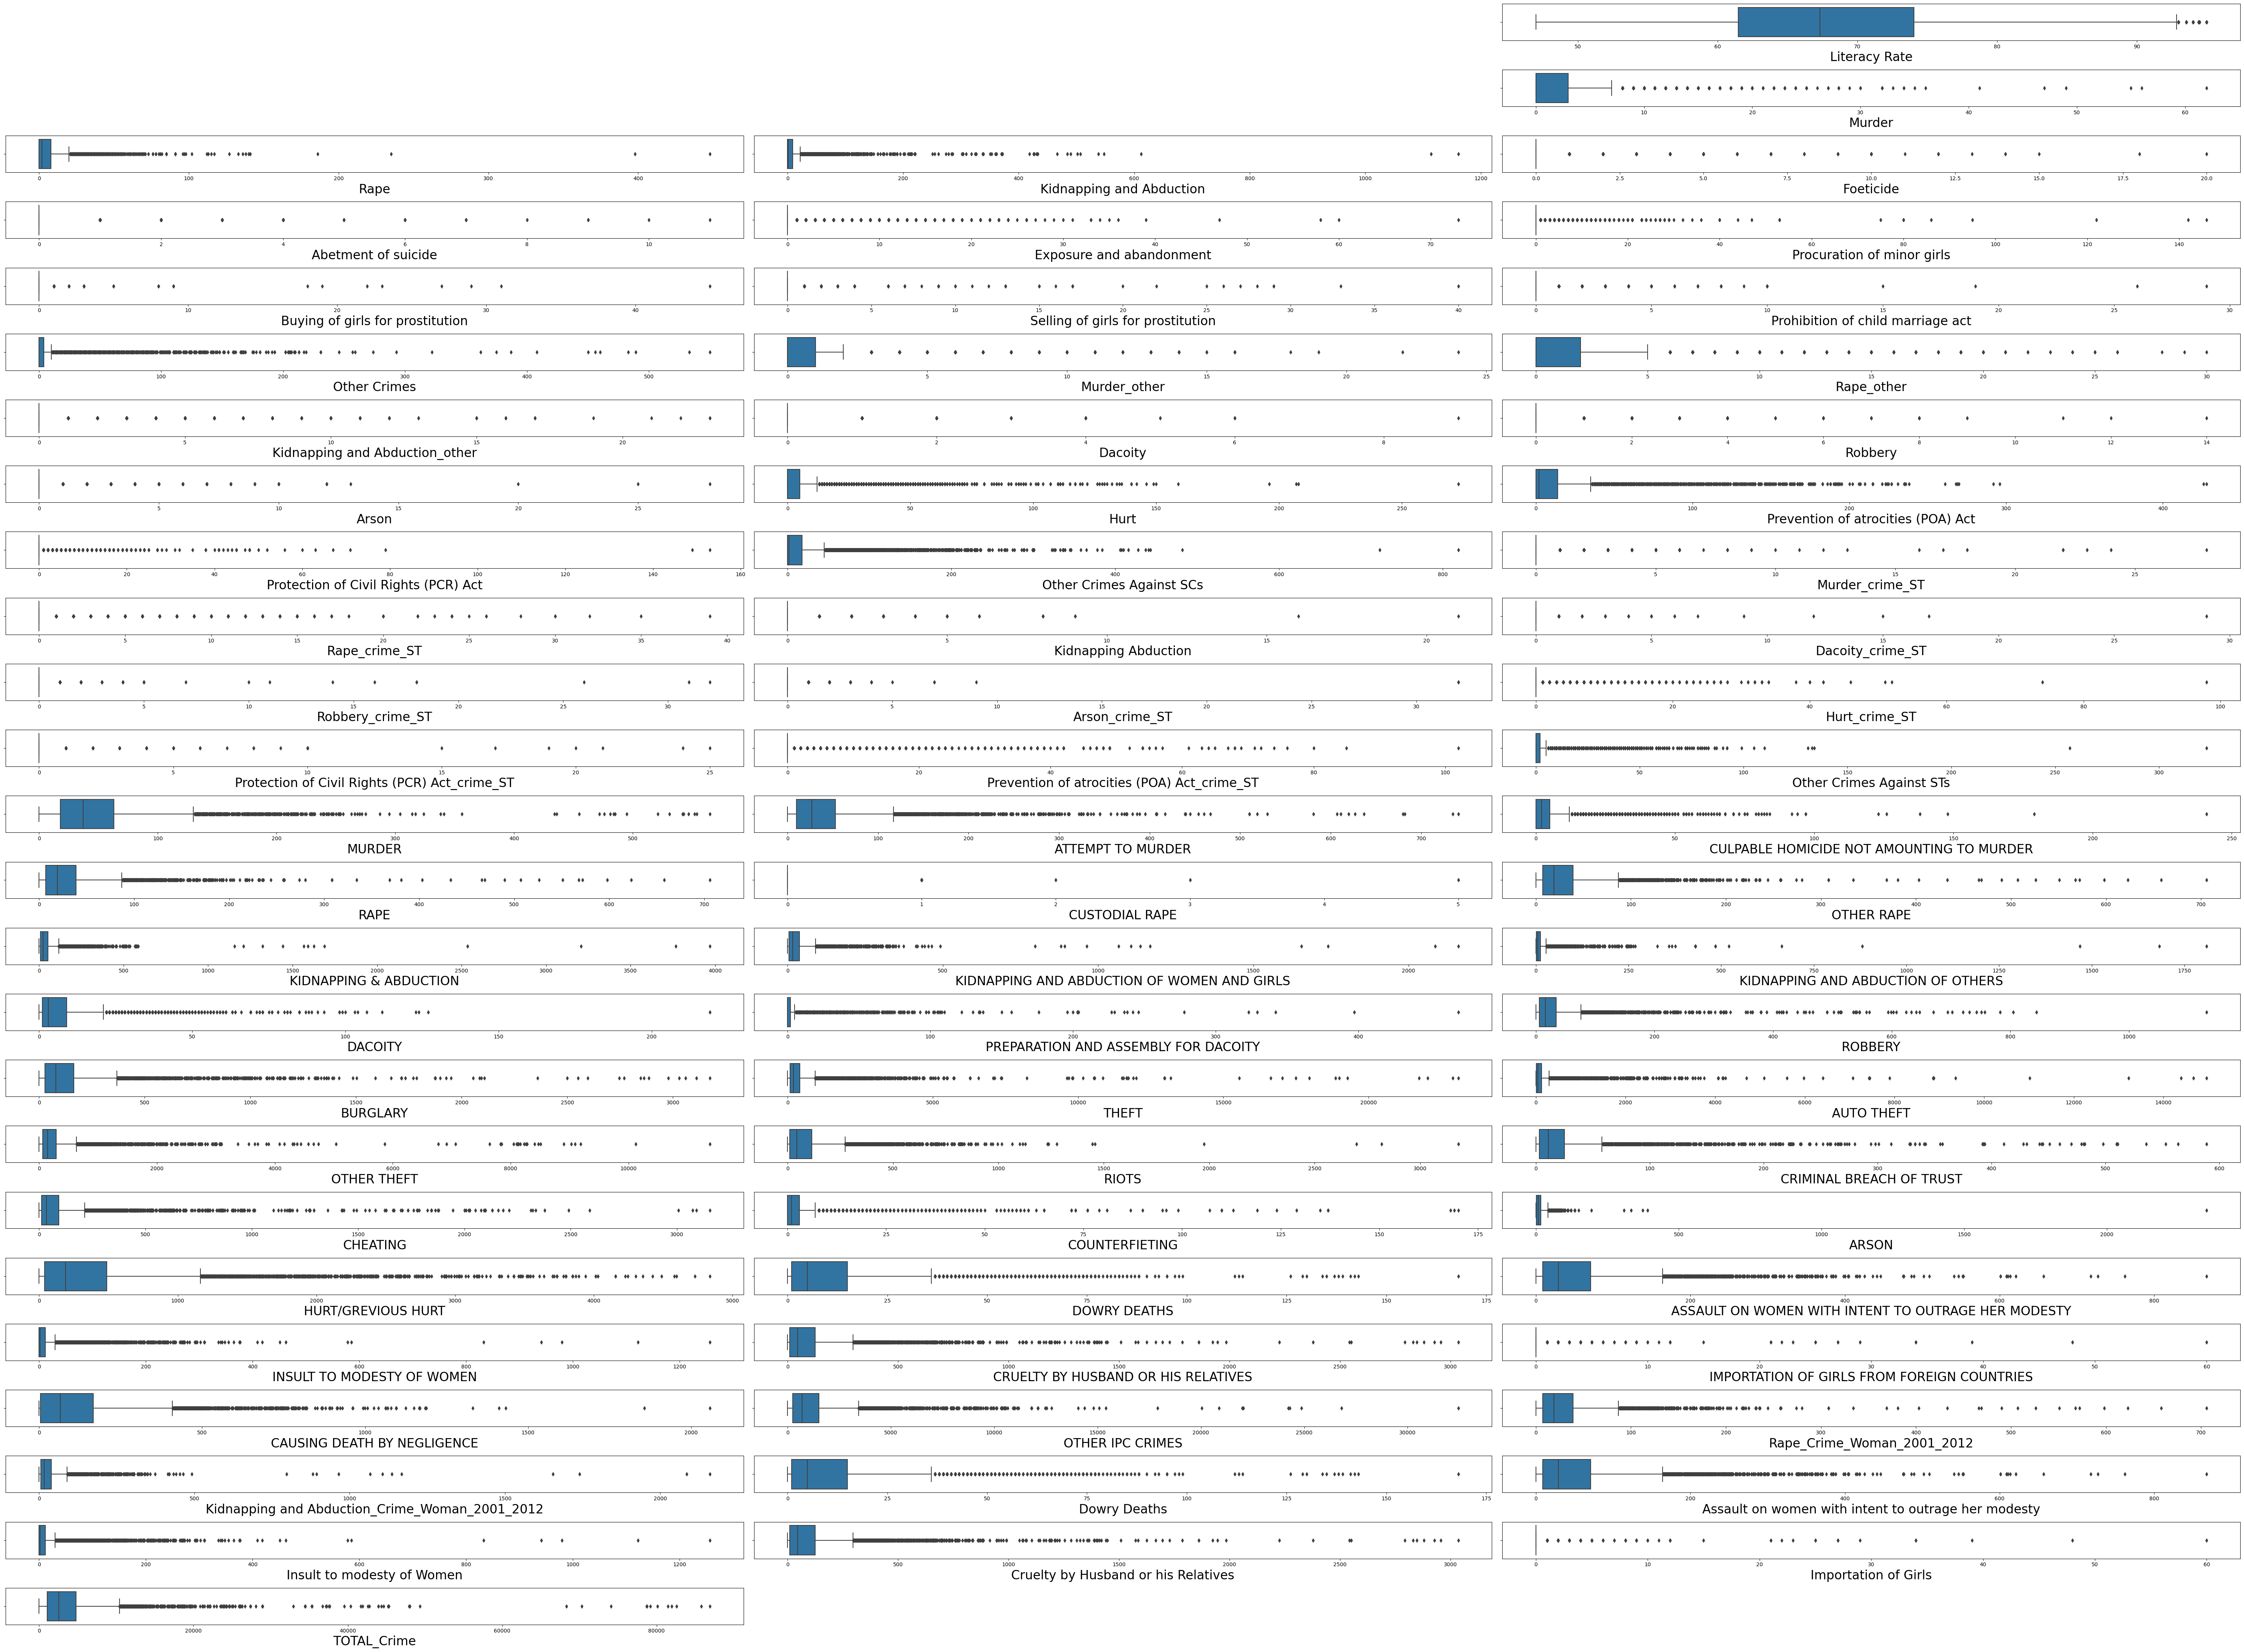

In [85]:
#Creating boxplot to checking
plt.figure(figsize=(60,70))
p=1
for i in Full_df.columns:
    
    if p<90:
        if i not in ["STATE/UT", "YEAR", "Area (Km2)", "DISTRICT"]:
            
            plt.subplot(40,3,p)
            sns.boxplot(x=Full_df[i],data=Full_df)
            plt.xlabel(i,fontsize=24)
        
    p+=1
    
plt.tight_layout()
plt.show()

**Here you can see all column has outliers.**

# Removing Outliers

**Using zscore**

In [86]:
#Inculding all columns those have outliers except our Target column to a variable named out.
out=Full_df[['Murder',
       'Rape', 'Kidnapping and Abduction', 'Foeticide', 'Abetment of suicide',
       'Exposure and abandonment', 'Procuration of minor girls',
       'Buying of girls for prostitution', 'Selling of girls for prostitution',
       'Prohibition of child marriage act', 'Other Crimes', 'Murder_other',
       'Rape_other', 'Kidnapping and Abduction_other', 'Dacoity', 'Robbery',
       'Arson', 'Hurt', 'Prevention of atrocities (POA) Act',
       'Protection of Civil Rights (PCR) Act', 'Other Crimes Against SCs',
       'Murder_crime_ST', 'Rape_crime_ST', 'Kidnapping Abduction',
       'Dacoity_crime_ST', 'Robbery_crime_ST', 'Arson_crime_ST',
       'Hurt_crime_ST', 'Protection of Civil Rights (PCR) Act_crime_ST',
       'Prevention of atrocities (POA) Act_crime_ST',
       'Other Crimes Against STs', 'MURDER', 'ATTEMPT TO MURDER',
       'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER', 'RAPE', 'CUSTODIAL RAPE',
       'OTHER RAPE', 'KIDNAPPING & ABDUCTION',
       'KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS',
       'KIDNAPPING AND ABDUCTION OF OTHERS', 'DACOITY',
       'PREPARATION AND ASSEMBLY FOR DACOITY', 'ROBBERY', 'BURGLARY', 'THEFT',
       'AUTO THEFT', 'OTHER THEFT', 'RIOTS', 'CRIMINAL BREACH OF TRUST',
       'CHEATING', 'COUNTERFIETING', 'ARSON', 'HURT/GREVIOUS HURT',
       'DOWRY DEATHS', 'ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY',
       'INSULT TO MODESTY OF WOMEN', 'CRUELTY BY HUSBAND OR HIS RELATIVES',
       'IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES',
       'CAUSING DEATH BY NEGLIGENCE', 'OTHER IPC CRIMES',
       'Rape_Crime_Woman_2001_2012',
       'Kidnapping and Abduction_Crime_Woman_2001_2012', 'Dowry Deaths',
       'Assault on women with intent to outrage her modesty',
       'Insult to modesty of Women', 'Cruelty by Husband or his Relatives',
       'Importation of Girls', 'TOTAL_Crime']]
from scipy.stats import zscore
z=np.abs(zscore(out))
z

,Murder,Rape,Kidnapping and Abduction,Foeticide,Abetment of suicide,Exposure and abandonment,Procuration of minor girls,Buying of girls for prostitution,Selling of girls for prostitution,Prohibition of child marriage act,...,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,Rape_Crime_Woman_2001_2012,Kidnapping and Abduction_Crime_Woman_2001_2012,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls,TOTAL_Crime
0,0.542200,0.490500,0.293065,0.177851,0.144287,0.327306,0.116168,0.04587,0.076331,0.177395,...,0.743894,0.530278,0.697850,0.460140,0.721162,0.515081,0.312471,0.504912,0.072237,0.595444
1,0.542200,0.490500,0.293065,0.177851,0.144287,0.327306,0.116168,0.04587,0.076331,0.177395,...,0.743894,0.715551,0.780364,0.490512,0.721162,0.763644,0.335569,0.553317,0.072237,0.741390
2,0.542200,0.490500,0.293065,0.177851,0.144287,0.327306,0.116168,0.04587,0.076331,0.177395,...,0.743894,0.526536,0.752859,0.475326,0.721162,0.544324,0.266276,0.531803,0.072237,0.612745
3,0.542200,0.490500,0.293065,0.177851,0.144287,0.327306,0.116168,0.04587,0.076331,0.177395,...,0.743894,0.716175,0.752859,0.490512,0.721162,0.763644,0.335569,0.553317,0.072237,0.739151
4,0.271131,0.345027,0.265191,0.177851,0.144287,0.327306,0.116168,0.04587,0.076331,0.177395,...,0.743894,0.537140,0.725355,0.460140,0.721162,0.646673,0.289373,0.515668,0.072237,0.603179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8715,0.542200,0.490500,0.293065,0.177851,0.144287,0.327306,0.116168,0.04587,0.076331,0.177395,...,5.079820,8.888073,18.637774,32.311476,8.293132,9.851444,4.468791,10.122729,0.072237,16.945635
8716,0.542200,0.490500,0.293065,0.177851,0.144287,0.327306,0.116168,0.04587,0.076331,0.177395,...,0.718380,0.010569,0.505319,0.217162,0.893338,0.295761,0.335569,0.075951,0.072237,0.032419
8717,0.542200,0.490500,0.293065,0.177851,0.144287,0.327306,0.116168,0.04587,0.076331,0.177395,...,0.731137,0.342510,0.477815,0.369023,0.182995,0.500460,0.335569,0.429615,0.072237,0.465577
8718,0.542200,0.490500,0.293065,0.177851,0.144287,0.327306,0.116168,0.04587,0.076331,0.177395,...,0.743894,0.582055,0.017265,0.323465,0.721162,0.749023,0.335569,0.499533,0.627890,0.580788


In [87]:
np.where(z>3)

(array([  17,   24,   24, ..., 8650, 8650, 8650], dtype=int64),
 array([ 3, 19, 23, ..., 64, 65, 67], dtype=int64))

In [88]:
#Checking the outliers value by giving their row and column location
z.iloc[17,3]

3.4298761519636796

**You can clearly see the value is above 3 that means it's an outlier.**

# Creating outlier free dataset

In [89]:
df=Full_df[(z<3).all(axis=1)]
df.shape

(5622, 73)

In [90]:
print("Old DataFrame",Full_df.shape[0])
print("New DataFrame",df.shape[0])

Old DataFrame 8655
New DataFrame 5622


In [91]:
#Calculating Data lost percentage after using zscore and  removeing outliers
print("Data lost parcentage:-",((Full_df.shape[0]-df.shape[0])/Full_df.shape[0])*100)

Data lost parcentage:- 35.04332755632582


**Here you can see I lost 35% of data as outliers and I can't afford it.Lets try IQR method.**

**Remove outliers using IQR method**

In [92]:
#Q3
Q3=out.quantile(.75)

In [93]:
#Q1
Q1=out.quantile(.25)

In [94]:
#IQR
IQR=Q3-Q1
df1=Full_df[~((Full_df<(Q1-1.5*IQR)) | (Full_df>(Q3+1.5*IQR))).any(axis=1)]

In [95]:
print("Old DataFrame",Full_df.shape[0])
print("New DataFrame",df1.shape[0])

Old DataFrame 8655
New DataFrame 1744


In [96]:
print("Data lost parcentage:-",((Full_df.shape[0]-df1.shape[0])/Full_df.shape[0])*100)

Data lost parcentage:- 79.84979780473715


**Using IQR I lost 79% data .That's huge.So I can't remove the outliers.I will go for further process with the outliers.**

# Checking data distribution for each column

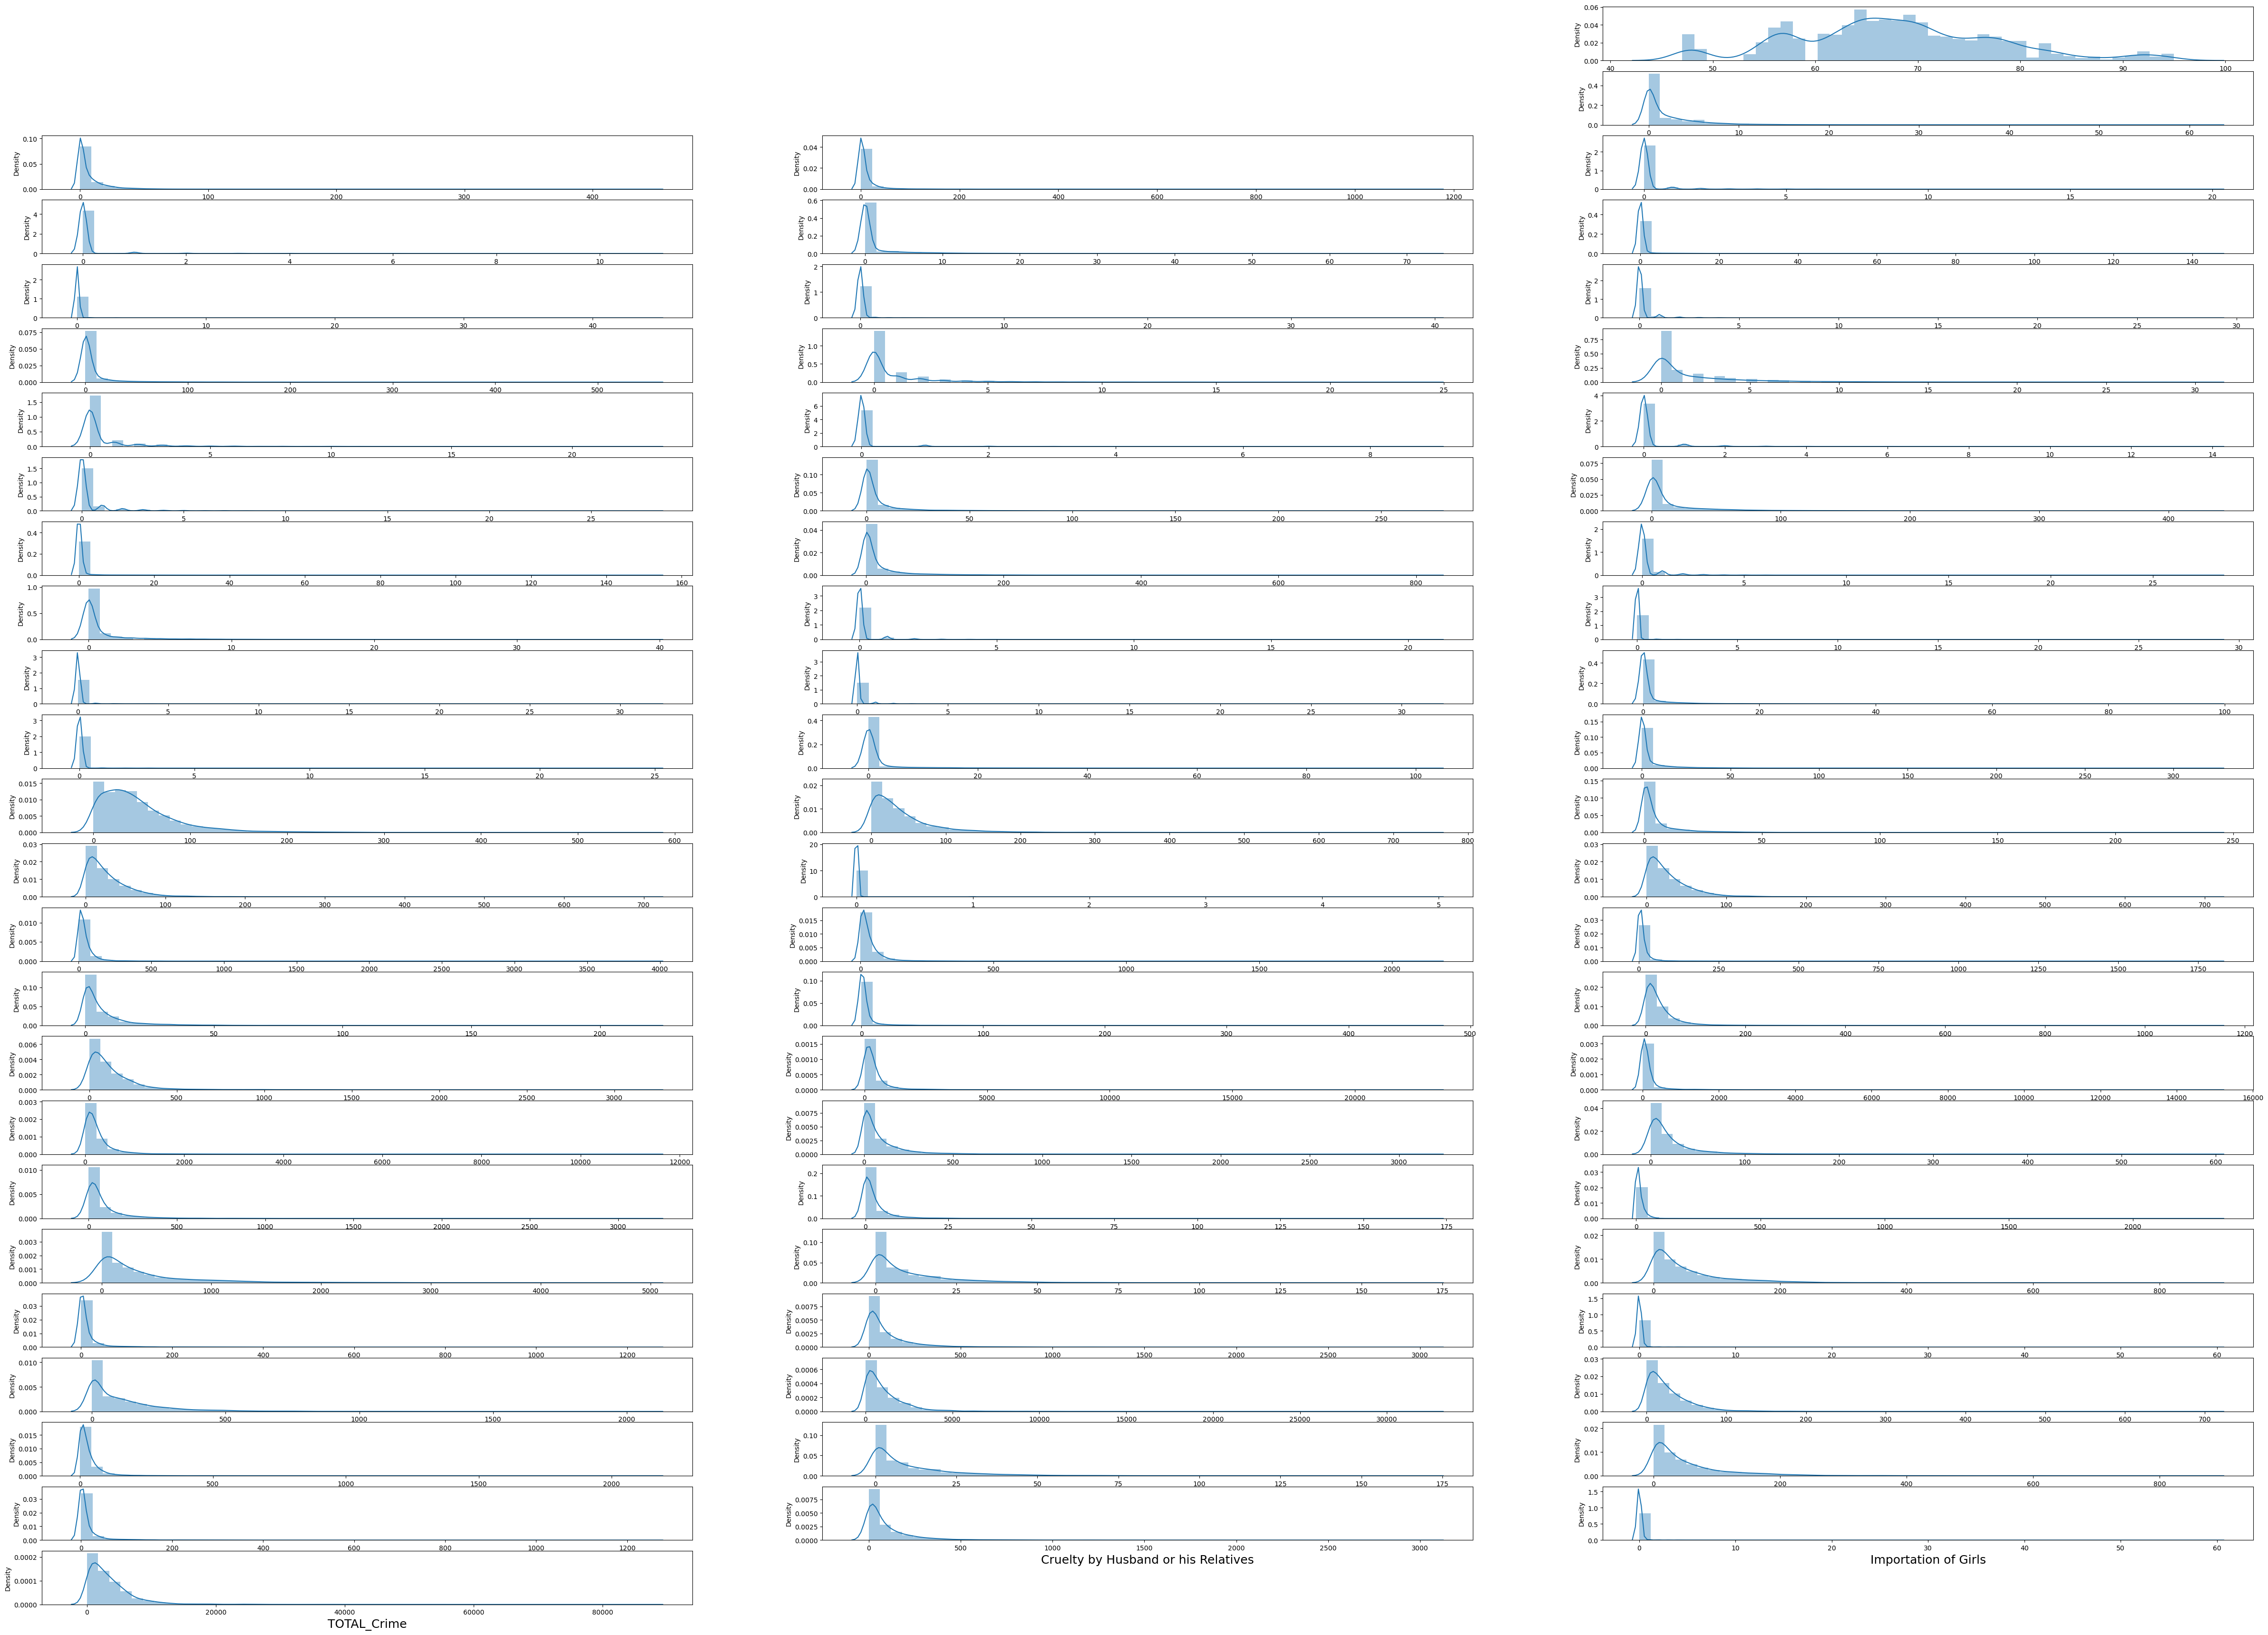

<Figure size 640x480 with 0 Axes>

In [97]:
plt .figure(figsize=(60,70))
plot=1

for i in Full_df.columns:
    if plot<80:
        if i not in ["STATE/UT", "YEAR", "Area (Km2)", "DISTRICT"]:
        
            plt.subplot(40,3,plot)
            sns.distplot(Full_df[i])
            plt.xlabel(i,fontsize=18)
        
    plot+=1
    
plt.show()
plt.tight_layout()

**Almost every column has right tail skewed data.**

# Checking Skewness

In [98]:
Full_df.skew()

YEAR                                                   -0.042546
Literacy Rate                                           0.275343
Area (Km2)                                              0.423613
Murder                                                  4.447352
Rape                                                    9.613792
                                                         ...    
Assault on women with intent to outrage her modesty     2.991093
Insult to modesty of Women                             10.987817
Cruelty by Husband or his Relatives                     6.461386
Importation of Girls                                   24.462048
TOTAL_Crime                                             7.231419
Length: 71, dtype: float64

**Observation:-**
    
*1) So here you can see most of the columns is above our default skewness range that is +0.5 to -0.5 but here I will not apply the different transformation method because If I do so then the data in it will change and that will effect my cluster porformance and it's also effect cluster prediction.*

# Model

In [99]:
# Import necessary libraries
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Drop non-numeric columns and handle missing values
numeric_df = Full_df.drop(columns=['STATE/UT', 'YEAR', 'DISTRICT'])


# Standardize the data
SS = StandardScaler()
scaled_data = SS.fit_transform(numeric_df)

model=KMeans(n_clusters=3,random_state=42)
result=model.fit_predict(scaled_data)
result

array([0, 0, 0, ..., 0, 0, 0])

In [100]:
model.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [101]:
pd.value_counts(result)

0    6536
2    2093
1      26
dtype: int64

In [102]:
#Looking at the points which belongs to cluster 0
Full_df[result==0]

,STATE/UT,YEAR,Literacy Rate,Area (Km2),DISTRICT,Murder,Rape,Kidnapping and Abduction,Foeticide,Abetment of suicide,...,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,Rape_Crime_Woman_2001_2012,Kidnapping and Abduction_Crime_Woman_2001_2012,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls,TOTAL_Crime
0,A & N ISLANDS,2001,81.30,8249,ANDAMAN,0.0,0.0,0.0,0.0,0.0,...,0.0,310.0,3.0,2.0,0.0,18.0,1.0,9.0,0.0,740.0
1,A & N ISLANDS,2001,81.30,8249,NICOBAR,0.0,0.0,0.0,0.0,0.0,...,0.0,13.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,23.0
2,A & N ISLANDS,2002,81.60,8249,ANDAMAN,0.0,0.0,0.0,0.0,0.0,...,0.0,316.0,1.0,1.0,0.0,16.0,3.0,4.0,0.0,655.0
3,A & N ISLANDS,2002,81.60,8249,NICOBAR,0.0,0.0,0.0,0.0,0.0,...,0.0,12.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,34.0
4,A & N ISLANDS,2003,81.97,8249,ANDAMAN,1.0,2.0,1.0,0.0,0.0,...,0.0,299.0,2.0,2.0,0.0,9.0,2.0,7.0,0.0,702.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8708,DELHI,2005,82.91,1484,G.R.P.(RLY),0.0,0.0,0.0,0.0,0.0,...,0.0,75.0,2.0,1.0,1.0,5.0,1.0,0.0,0.0,2270.0
8716,HARYANA,2001,67.91,44212,HISSAR,0.0,0.0,0.0,0.0,0.0,...,4.0,1177.0,10.0,18.0,24.0,33.0,0.0,117.0,0.0,3506.0
8717,HARYANA,2001,67.91,44212,MAHENDRAGARH,0.0,0.0,0.0,0.0,0.0,...,2.0,611.0,11.0,8.0,8.0,19.0,0.0,23.0,0.0,1378.0
8718,JHARKHAND,2001,53.56,79716,GUMLA,0.0,0.0,0.0,0.0,0.0,...,0.0,227.0,29.0,11.0,0.0,2.0,0.0,10.0,1.0,812.0


In [103]:
Full_df[result==1]

,STATE/UT,YEAR,Literacy Rate,Area (Km2),DISTRICT,Murder,Rape,Kidnapping and Abduction,Foeticide,Abetment of suicide,...,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,Rape_Crime_Woman_2001_2012,Kidnapping and Abduction_Crime_Woman_2001_2012,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls,TOTAL_Crime
1807,DELHI,2001,81.67,1484,DELHI UT TOTAL,22.0,113.0,612.0,2.0,0.0,...,432.0,22000.0,381.0,964.0,113.0,502.0,90.0,138.0,0.0,78768.0
1820,DELHI,2002,81.97,1484,DELHI UT TOTAL,29.0,138.0,426.0,20.0,0.0,...,416.0,20876.0,403.0,893.0,135.0,446.0,128.0,135.0,0.0,70325.0
1834,DELHI,2003,82.34,1484,DELHI UT TOTAL,32.0,140.0,255.0,2.0,0.0,...,402.0,20045.0,490.0,797.0,130.0,489.0,105.0,1211.0,0.0,68332.0
1847,DELHI,2004,82.64,1484,DELHI UT TOTAL,41.0,186.0,371.0,4.0,0.0,...,433.0,22048.0,551.0,881.0,126.0,601.0,130.0,1254.0,0.0,78686.0
1860,DELHI,2005,82.91,1484,DELHI UT TOTAL,34.0,235.0,507.0,3.0,0.0,...,634.0,24299.0,658.0,1106.0,114.0,762.0,225.0,1324.0,1.0,81484.0
3667,KARNATAKA,2009,69.24,191791,BANGALORE COMMR.,3.0,0.0,3.0,0.0,0.0,...,87.0,9992.0,65.0,2.0,50.0,251.0,35.0,367.0,0.0,45314.0
3700,KARNATAKA,2010,69.63,191791,BANGALORE COMMR.,2.0,1.0,9.0,0.0,0.0,...,104.0,10333.0,65.0,29.0,52.0,308.0,50.0,398.0,0.0,44355.0
3734,KARNATAKA,2011,75.37,191791,BANGALORE COMMR.,4.0,13.0,34.0,0.0,0.0,...,108.0,8297.0,97.0,206.0,53.0,250.0,40.0,458.0,0.0,42772.0
3769,KARNATAKA,2012,75.71,191791,BANGALORE COMMR.,16.0,38.0,370.0,2.0,0.0,...,170.0,7665.0,90.0,433.0,51.0,321.0,51.0,524.0,0.0,41924.0
4670,MAHARASHTRA,2001,76.88,307713,MUMBAI,7.0,43.0,26.0,2.0,2.0,...,709.0,6095.0,127.0,12.0,18.0,274.0,44.0,198.0,0.0,41650.0


In [104]:
Full_df[result==2]

,STATE/UT,YEAR,Literacy Rate,Area (Km2),DISTRICT,Murder,Rape,Kidnapping and Abduction,Foeticide,Abetment of suicide,...,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,Rape_Crime_Woman_2001_2012,Kidnapping and Abduction_Crime_Woman_2001_2012,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls,TOTAL_Crime
24,ANDHRA PRADESH,2001,60.47,162975,ADILABAD,0.0,0.0,0.0,0.0,0.0,...,181.0,1518.0,50.0,30.0,16.0,149.0,34.0,175.0,0.0,4976.0
25,ANDHRA PRADESH,2001,60.47,162975,ANANTAPUR,19.0,12.0,29.0,0.0,6.0,...,270.0,754.0,23.0,30.0,7.0,118.0,24.0,154.0,0.0,5130.0
26,ANDHRA PRADESH,2001,60.47,162975,CHITTOOR,0.0,0.0,0.0,0.0,0.0,...,404.0,1262.0,27.0,34.0,14.0,112.0,83.0,186.0,0.0,7199.0
28,ANDHRA PRADESH,2001,60.47,162975,EAST GODAVARI,0.0,0.0,0.0,0.0,0.0,...,431.0,2313.0,23.0,26.0,12.0,109.0,58.0,247.0,0.0,8178.0
30,ANDHRA PRADESH,2001,60.47,162975,GUNTUR,0.0,0.0,0.0,0.0,0.0,...,369.0,2426.0,54.0,51.0,7.0,139.0,129.0,378.0,0.0,10040.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8670,WEST BENGAL,2012,76.60,88752,UTTAR DINAJPUR,6.0,18.0,26.0,0.0,0.0,...,3.0,1839.0,92.0,258.0,9.0,150.0,5.0,623.0,0.0,7295.0
8680,KERALA,2003,91.61,38863,TRIVANDRUM RURAL,0.0,0.0,0.0,0.0,0.0,...,0.0,3787.0,28.0,23.0,7.0,212.0,4.0,232.0,0.0,8475.0
8693,DELHI,2002,81.97,1484,NORTH WEST,0.0,0.0,0.0,0.0,0.0,...,50.0,4674.0,120.0,259.0,26.0,101.0,16.0,20.0,0.0,12573.0
8699,DELHI,2003,82.34,1484,NORTH WEST,0.0,0.0,0.0,0.0,0.0,...,45.0,4419.0,128.0,191.0,27.0,102.0,14.0,290.0,0.0,12154.0


# 4.1  "Create 3 clusters as below.1. Sensitive Area's. 2. Moderate Area's. 3. Peaceful Area's"

In [108]:
#Creating 3 Clusters according to the crime
sensitive_areas_df = Full_df[result==1]
moderate_areas_df = Full_df[result==2]
peaceful_areas_df = Full_df[result==0]

# 4.2  Create DataFrame for each cluster that shows data according to the areas.

In [110]:
sensitive_areas_df['Category'] = 'Sensitive Areas'
moderate_areas_df['Category'] = 'Moderate Areas'
peaceful_areas_df['Category'] = 'Peaceful Areas'


In [111]:
sensitive_areas_df

,STATE/UT,YEAR,Literacy Rate,Area (Km2),DISTRICT,Murder,Rape,Kidnapping and Abduction,Foeticide,Abetment of suicide,...,OTHER IPC CRIMES,Rape_Crime_Woman_2001_2012,Kidnapping and Abduction_Crime_Woman_2001_2012,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls,TOTAL_Crime,Category
1807,DELHI,2001,81.67,1484,DELHI UT TOTAL,22.0,113.0,612.0,2.0,0.0,...,22000.0,381.0,964.0,113.0,502.0,90.0,138.0,0.0,78768.0,Sensitive Areas
1820,DELHI,2002,81.97,1484,DELHI UT TOTAL,29.0,138.0,426.0,20.0,0.0,...,20876.0,403.0,893.0,135.0,446.0,128.0,135.0,0.0,70325.0,Sensitive Areas
1834,DELHI,2003,82.34,1484,DELHI UT TOTAL,32.0,140.0,255.0,2.0,0.0,...,20045.0,490.0,797.0,130.0,489.0,105.0,1211.0,0.0,68332.0,Sensitive Areas
1847,DELHI,2004,82.64,1484,DELHI UT TOTAL,41.0,186.0,371.0,4.0,0.0,...,22048.0,551.0,881.0,126.0,601.0,130.0,1254.0,0.0,78686.0,Sensitive Areas
1860,DELHI,2005,82.91,1484,DELHI UT TOTAL,34.0,235.0,507.0,3.0,0.0,...,24299.0,658.0,1106.0,114.0,762.0,225.0,1324.0,1.0,81484.0,Sensitive Areas
3667,KARNATAKA,2009,69.24,191791,BANGALORE COMMR.,3.0,0.0,3.0,0.0,0.0,...,9992.0,65.0,2.0,50.0,251.0,35.0,367.0,0.0,45314.0,Sensitive Areas
3700,KARNATAKA,2010,69.63,191791,BANGALORE COMMR.,2.0,1.0,9.0,0.0,0.0,...,10333.0,65.0,29.0,52.0,308.0,50.0,398.0,0.0,44355.0,Sensitive Areas
3734,KARNATAKA,2011,75.37,191791,BANGALORE COMMR.,4.0,13.0,34.0,0.0,0.0,...,8297.0,97.0,206.0,53.0,250.0,40.0,458.0,0.0,42772.0,Sensitive Areas
3769,KARNATAKA,2012,75.71,191791,BANGALORE COMMR.,16.0,38.0,370.0,2.0,0.0,...,7665.0,90.0,433.0,51.0,321.0,51.0,524.0,0.0,41924.0,Sensitive Areas
4670,MAHARASHTRA,2001,76.88,307713,MUMBAI,7.0,43.0,26.0,2.0,2.0,...,6095.0,127.0,12.0,18.0,274.0,44.0,198.0,0.0,41650.0,Sensitive Areas


In [112]:
moderate_areas_df

,STATE/UT,YEAR,Literacy Rate,Area (Km2),DISTRICT,Murder,Rape,Kidnapping and Abduction,Foeticide,Abetment of suicide,...,OTHER IPC CRIMES,Rape_Crime_Woman_2001_2012,Kidnapping and Abduction_Crime_Woman_2001_2012,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls,TOTAL_Crime,Category
24,ANDHRA PRADESH,2001,60.47,162975,ADILABAD,0.0,0.0,0.0,0.0,0.0,...,1518.0,50.0,30.0,16.0,149.0,34.0,175.0,0.0,4976.0,Moderate Areas
25,ANDHRA PRADESH,2001,60.47,162975,ANANTAPUR,19.0,12.0,29.0,0.0,6.0,...,754.0,23.0,30.0,7.0,118.0,24.0,154.0,0.0,5130.0,Moderate Areas
26,ANDHRA PRADESH,2001,60.47,162975,CHITTOOR,0.0,0.0,0.0,0.0,0.0,...,1262.0,27.0,34.0,14.0,112.0,83.0,186.0,0.0,7199.0,Moderate Areas
28,ANDHRA PRADESH,2001,60.47,162975,EAST GODAVARI,0.0,0.0,0.0,0.0,0.0,...,2313.0,23.0,26.0,12.0,109.0,58.0,247.0,0.0,8178.0,Moderate Areas
30,ANDHRA PRADESH,2001,60.47,162975,GUNTUR,0.0,0.0,0.0,0.0,0.0,...,2426.0,54.0,51.0,7.0,139.0,129.0,378.0,0.0,10040.0,Moderate Areas
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8670,WEST BENGAL,2012,76.60,88752,UTTAR DINAJPUR,6.0,18.0,26.0,0.0,0.0,...,1839.0,92.0,258.0,9.0,150.0,5.0,623.0,0.0,7295.0,Moderate Areas
8680,KERALA,2003,91.61,38863,TRIVANDRUM RURAL,0.0,0.0,0.0,0.0,0.0,...,3787.0,28.0,23.0,7.0,212.0,4.0,232.0,0.0,8475.0,Moderate Areas
8693,DELHI,2002,81.97,1484,NORTH WEST,0.0,0.0,0.0,0.0,0.0,...,4674.0,120.0,259.0,26.0,101.0,16.0,20.0,0.0,12573.0,Moderate Areas
8699,DELHI,2003,82.34,1484,NORTH WEST,0.0,0.0,0.0,0.0,0.0,...,4419.0,128.0,191.0,27.0,102.0,14.0,290.0,0.0,12154.0,Moderate Areas


In [113]:
peaceful_areas_df

,STATE/UT,YEAR,Literacy Rate,Area (Km2),DISTRICT,Murder,Rape,Kidnapping and Abduction,Foeticide,Abetment of suicide,...,OTHER IPC CRIMES,Rape_Crime_Woman_2001_2012,Kidnapping and Abduction_Crime_Woman_2001_2012,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls,TOTAL_Crime,Category
0,A & N ISLANDS,2001,81.30,8249,ANDAMAN,0.0,0.0,0.0,0.0,0.0,...,310.0,3.0,2.0,0.0,18.0,1.0,9.0,0.0,740.0,Peaceful Areas
1,A & N ISLANDS,2001,81.30,8249,NICOBAR,0.0,0.0,0.0,0.0,0.0,...,13.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,23.0,Peaceful Areas
2,A & N ISLANDS,2002,81.60,8249,ANDAMAN,0.0,0.0,0.0,0.0,0.0,...,316.0,1.0,1.0,0.0,16.0,3.0,4.0,0.0,655.0,Peaceful Areas
3,A & N ISLANDS,2002,81.60,8249,NICOBAR,0.0,0.0,0.0,0.0,0.0,...,12.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,34.0,Peaceful Areas
4,A & N ISLANDS,2003,81.97,8249,ANDAMAN,1.0,2.0,1.0,0.0,0.0,...,299.0,2.0,2.0,0.0,9.0,2.0,7.0,0.0,702.0,Peaceful Areas
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8708,DELHI,2005,82.91,1484,G.R.P.(RLY),0.0,0.0,0.0,0.0,0.0,...,75.0,2.0,1.0,1.0,5.0,1.0,0.0,0.0,2270.0,Peaceful Areas
8716,HARYANA,2001,67.91,44212,HISSAR,0.0,0.0,0.0,0.0,0.0,...,1177.0,10.0,18.0,24.0,33.0,0.0,117.0,0.0,3506.0,Peaceful Areas
8717,HARYANA,2001,67.91,44212,MAHENDRAGARH,0.0,0.0,0.0,0.0,0.0,...,611.0,11.0,8.0,8.0,19.0,0.0,23.0,0.0,1378.0,Peaceful Areas
8718,JHARKHAND,2001,53.56,79716,GUMLA,0.0,0.0,0.0,0.0,0.0,...,227.0,29.0,11.0,0.0,2.0,0.0,10.0,1.0,812.0,Peaceful Areas


# 4.3  "Analyse your clusters and prepare a report that explains all your observations.
*Example -*

*1. What is impacting more crimes in sensitive areas.*

*2. What needs to be done to reduce crime.*

*3. Most safe and unsafe districts.*

*4. Etc.......Anything that you observe (If you want, you can plot various graphs to analyze)"*

# 1. What is impacting more crimes in sensitive areas.

# Answer:-

As you can see sensitive areas are like Delhi,Mumbai,Bangalore These are Tear 1 cities thats why population is really dense.So managing the law and order is little bit challenging.

# 2. What needs to be done to reduce crime.

# Answer:-

*1) To reduce crime we can do different things like we can increase the police petrol.* 

*2) Also we can use data driven approch like we can predict the hotspot location where we can increase the police petrolling.*

*3) We need to do more things like youth power empowerment, increasing the literacy rate like these kind of things.*

# 3. Most safe and unsafe districts.

In [118]:
Most_Unsafe_Dist=Full_df.groupby("DISTRICT")["TOTAL_Crime"].sum().sort_values(ascending=False)
Most_Unsafe_Dist

DISTRICT
DELHI UT TOTAL      948233.0
BANGALORE COMMR.    470561.0
MUMBAI COMMR.       323121.0
AHMEDABAD COMMR.    295714.0
HYDERABAD CITY      283202.0
                      ...   
GARI HILLS EAST          0.0
RAILWAYSKMR              0.0
KANCHEEPURAM             0.0
RAILWAYSJMU              0.0
C.B.KASHMIR              0.0
Name: TOTAL_Crime, Length: 823, dtype: float64

**Here you can see the DELHI is the Most unsafe district.**

In [119]:
Most_Safe_Dist=Full_df.groupby("DISTRICT")["TOTAL_Crime"].sum().sort_values(ascending=True)
Most_Safe_Dist

DISTRICT
RAILWAYSKMR              0.0
RAILWAYSJMU              0.0
GARI HILLS EAST          0.0
KANCHEEPURAM             0.0
C.B.KASHMIR              0.0
                      ...   
HYDERABAD CITY      283202.0
AHMEDABAD COMMR.    295714.0
MUMBAI COMMR.       323121.0
BANGALORE COMMR.    470561.0
DELHI UT TOTAL      948233.0
Name: TOTAL_Crime, Length: 823, dtype: float64

**Here you can see the RAILWAYSKMR is the most safe district.**

# 4. Etc.......Anything that you observe (If you want, you can plot various graphs to analyze)"

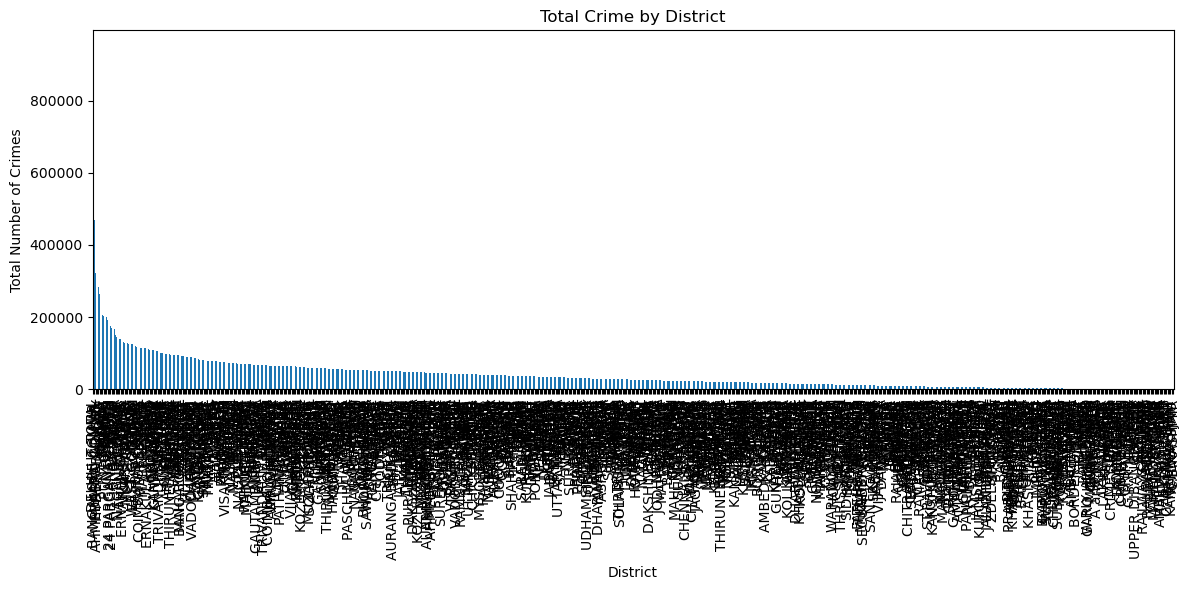

In [121]:

plt.figure(figsize=(12, 6))
total_crime_by_district = Full_df.groupby('DISTRICT')['TOTAL_Crime'].sum().sort_values(ascending=False)
total_crime_by_district.plot(kind='bar')
plt.title('Total Crime by District')
plt.xlabel('District')
plt.ylabel('Total Number of Crimes')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

**Here you can't get a clear idea because we have 823 unique district name.**

In [123]:
Full_df["DISTRICT"].nunique()

823

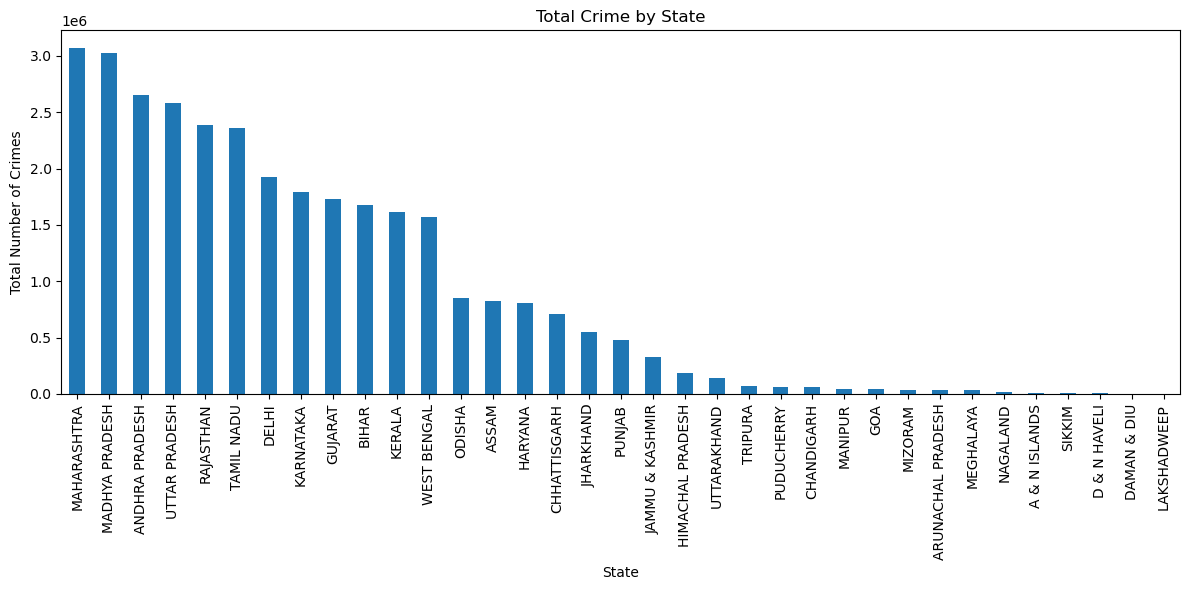

In [124]:
plt.figure(figsize=(12, 6))
total_crime_by_State = Full_df.groupby('STATE/UT')['TOTAL_Crime'].sum().sort_values(ascending=False)
total_crime_by_State.plot(kind='bar')
plt.title('Total Crime by State')
plt.xlabel('State')
plt.ylabel('Total Number of Crimes')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

**Now you can see the Maharastra and Madhya Pradesh has the most crime that has been recorded.**

# 4.4   Capstone project overall story in your own words. Min 1000 words.

# India's Crime Analysis

**Introduction:-**

In the huge landscape of India, the issue of crime deeply effects every citizen. India’s diverse region is the challenging phase to enforce law and order. In this Capstone project we analyzed where the Crime rate is low or high. We analysis all the district also we do analysis of each state population and area also and marked an idea where we have to increase the law enforcement. This data driven project will help government, policymakers, law enforcement agencies.

**Understanding of data:-**

So, our journey starts with the different dataset that we got like IPC crime dataset, SC crime dataset, ST crime dataset, Crime against woman dataset, Crime against children dataset, Human right violation dataset and crime against police dataset and some more dataset. Some of this dataset has 2001 to 2012 year's data and some of it has 2001 to 2010 data about crime. Each of these datasets has unique values and help us to understand the unique perspective on different facts of crime. Before going to any other steps, we cleaned the data to ensure the accuracy and consistency of our data.

**Collecting the data:-**

We had not got the all-necessary dataset but to select the high crime area or low crime area or moderate area we had need some more information like literacy rate of that area or the total landscape of the area that kind of thing. For that I did use the scraping techniques. Additionally, I took poverty rate data also.

**Exploratory Data Analysis (EDA):-**

In the exploratory data analysis, we actually clean all the dataset first then merge one by one dataset to get only one dataset with all the information. After merging we checked is there any null value and duplicate rows are present or not. For me some duplicate rows I find so I delete them. Then we do some analysis like IPC crime with Literacy rate, ST crime verses Literacy rate and one by one we analysis all my crime dataset with the literacy rate. Then after merging all the dataset, I create a total crime column and by using that column I analyzed the Total crime with literacy rate. Then we analysis all state literacy rate. Then we do year on year crime rate analysis and did more analysis with visualization like Area and overall crime analysis, Population vs overall crime, Overall crime with state wise and many more. After that we do some analysis to check which of the places has huge crime rate state wise, year wise and District wise. After that we checked the outliers and when I try to find that how much data lost happens if I remove the outliers with the zscore we get 35% data should lost so I tried different technique to remove outliers that is IQR. But after using the IQR method I noticed if I use IQR I will lose 79% of our data as outliers. So, I drop the intended to remove outliers. After that I try to check the data distribution for each crime column and we found that almost every column has the right skewed data. After that I check the skewness for each column and I noticed that most of the column’s data not fall in our acceptable range that is +0.5 to -0.5 but I did not apply any transformation methods for those columns because if I do so my clustering will get effected and I might to get the actual clustering.

**Clustering Analysis:-**

So, for clustering I used the K-means algorithm. Our task was to create three cluster with our final dataset with district wise so we can see the of three cluster categories with Sensitive area, Moderated areas and Peaceful areas. So, I created these Clusters and makes separate dataset for each and again did some analysis so government, policy makers and law enforcement team get the actual idea of crime pattern, crime rates and crime hotspots. After that I find the most unsafe and most safe district also.

**Recommendations:-**

Our analysis gives and insight of India's crime landscape. We discover that sensitive areas, such as major cities like Delhi, Mumbai, and Bangalore, experience higher crime rates due to their dense population and urban challenges. To address this, we propose strategies such as increased police patrolling, data-driven approaches to predict hotspot locations, and initiatives focused on youth empowerment and literacy enhancement. Furthermore, our analysis identifies Delhi as the most unsafe district and Railwayskmr as the safest district based on total crime counts. These findings underscore the importance of targeted interventions to address crime for across regions.

So now let’s see what step we can take to reduce the crime:

*1) Increased police presence and patrolling in high-crime areas to deter criminal activities and enhance public safety. If we identify the crime hotspot we can easily prevent more crimes.*

*2) Implementation of data-driven approaches utilizing predictive analytics to identify where most of the crime occur and deploy resources strategically.*

*3) Community engagement initiatives focused on youth empowerment. If we empower the youth then there is a high chance that we can reduce the crime rate. Also, by increasing the education, and skill development to address root causes of crime and foster social cohesion and by doing that we can cut off the youth for doing the crime.*

Strengthening of law enforcement agencies through training, technology adoption, and inter-agency coordination to improve responsiveness and effectiveness in combating crime.


**Conclusion:-**

In conclusion we can say our capstone project serves as a comprehensive exploration of India's crime landscape. Giving the data-driven insights to inform policy and decision-making. Through the different analysis and different visualization, we can understand the complexity of the crime pattern, identify the key challenges. So, at last I would like to say with the power of data analysis we can contribute towards building a safer and more secure future for all citizen of India. Ultimately contributing to the creation of safer and more secure communities across India. As we navigate the complexities of crime dynamics, our commitment to data-driven solutions remains steadfast, driving positive change and fostering a culture of safety and resilience for all citizens.